## Table Of Contents <a id="index"></a>


- [Dataset managing](#dataset)  
- [District Data](#district-data)
- [Data Exploration](#data-exploration)
- [Matrix](#matrix)
  

#### Models
- [**Decision Tree**](#decision-tree)
    - [**Parameter Tunning**](#parameter-tunning)
- [**K-Nearest Neighbor**](#k-nearest-neighbor)
    - [**Parameter Tunning**](#parameter-tunning-2)  
- [**Support-Vector Machines**](#support-vector-machines)
    - [**Parameter Tunning**](#parameter-tunning-3)
- [**Neural Networks**](#neural-networks)
    - [**Parameter Tunning**](#parameter-tunning-4)
- [**Logistic Regression**](#logistic-regression)
    - [**Parameter Tunning**](#parameter-tunning-5)
- [**Naive Bayes**](#naive-bayes)
    - [**Parameter Tunning**](#parameter-tunning-6)
- [**Random Forest**](#random-forest)
    - [**Parameter Tunning**](#parameter-tunning-7)
- [**XGBoost**](#xgboost)
    - [**Parameter Tunning**](#parameter-tunning-8)
- [**MLP**](#mlp)
    - [**Parameter Tunning**](#parameter-tunning-9)
- [**Ada Boost**](#ada-boost)
    - [**Parameter Tunning**](#parameter-tunning-10)
- [**Voting**](#voting)

#### [Apply Model](#apply-model)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
import plotly.graph_objects as go
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import RFECV
from datetime import date
from sklearn import preprocessing

In [3]:
show_graphs = True
run_aggr = False

In [4]:
def dataset(x, missing = ""):
    return pd.read_csv('Dataset/' + x + '.csv', sep = ';', low_memory = False, na_values = missing_values).rename(str.strip, axis = 'columns')

In [5]:
def abs_min(x):
    return x.abs().min()
abs_min.__name__ = 'abs_min'

def rangev(x):
    return x.max() - x.min()
rangev.__name__ = 'range'

In [6]:
def get_decade(year):
    year_int = int(year)
    string = str(year_int//10) + "0-" + str(year_int//10) + "9"
    return string

In [7]:
def get_month(year):
    string = year[2:4] + "/" + year[0:2]
    return string

In [8]:
def get_balance(year):
    year_int = int(float(year))
    string = "1" + "0"*(len(str(year_int))-1) + "-" + "9" + "9"*(len(str(year_int))-1)
    return string

In [9]:
def calculateAge(birthDate, loanDate):
    loan = list(map(int,loanDate.split("-")))
    birth = list(map(int,birthDate.split("-")))

    loan_date = date(loan[0], loan[1], loan[2])
    

    birth_date = date(birth[0], birth[1], birth[2])
    return (int((loan_date-birth_date).days/365))

In [10]:
def count_credit_cash(val):
    return sum(val=="credit in cash")
def count_collect(val):
    return sum(val=="collection from another bank")
def count_with_cash(val):
    return sum(val=="withdrawal in cash")
def count_remi(val):
    return sum(val=="remittance to another bank")
def count_with_card(val):
    return sum(val=="credit card withdrawal")
def count_interest(val):
    return sum(val=="interest credited")

def count_withdrawal(val):
    return sum(val=="withdrawal")
def count_credit(val):
    return sum(val=="credit")

Functions for getting the mean of the operations

In [11]:
def mean_credit_cash(val):
    return np.mean(val=="credit in cash")
def mean_collect(val):
    return np.mean(val=="collection from another bank")
def mean_with_cash(val):
    return np.mean(val=="withdrawal in cash")
def mean_remi(val):
    return np.mean(val=="remittance to another bank")
def mean_with_card(val):
    return np.mean(val=="credit card withdrawal")
def mean_interest(val):
    return np.mean(val=="interest credited")

def mean_withdrawal(val):
    return np.mean(val=="withdrawal")
def mean_credit(val):
    return np.mean(val=="credit")

Functions for getting the standard deviation of the operations

In [12]:
def std_credit_cash(val):
    return np.std(val=="credit in cash")
def std_collect(val):
    return np.std(val=="collection from another bank")
def std_with_cash(val):
    return np.std(val=="withdrawal in cash")
def std_remi(val):
    return np.std(val=="remittance to another bank")
def std_with_card(val):
    return np.std(val=="credit card withdrawal")
def std_interest(val):
    return np.std(val=="interest credited")


def std_withdrawal(val):
    return np.std(val=="withdrawal")
def std_credit(val):
    return np.std(val=="credit")

Functions for getting the covariance of the operations

In [13]:
def cov_credit_cash(val):
    return np.cov(val=="credit in cash")
def cov_collect(val):
    return np.cov(val=="collection from another bank")
def cov_with_cash(val):
    return np.cov(val=="withdrawal in cash")
def cov_remi(val):
    return np.cov(val=="remittance to another bank")
def cov_with_card(val):
    return np.cov(val=="credit card withdrawal")
def cov_interest(val):
    return np.cov(val=="interest credited")

def cov_withdrawal(val):
    return np.cov(val=="withdrawal")
def cov_credit(val):
    return np.cov(val=="credit")

In [14]:
def count_disponents(val):
    return sum(val=="DISPONENT")

Function to merge the datasets

In [15]:
def merge_dataset(loan, district, client, card, trans, account, disp):

    df = loan
    df = pd.merge(df, trans, on = 'account_id', suffixes = ('', '_trans'))
    df = pd.merge(df, account, on = 'account_id', suffixes = ('', '_account'))
    
    df = pd.merge(df, district.set_index('code'), left_on = 'district_id', right_index = True, suffixes = ('', '_district'))
    df = pd.merge(df, disp, on = 'account_id', suffixes = ('', '_disp'))
    df = pd.merge(df, card, on = 'disp_id', how = 'outer', suffixes = ('', '_card'))
    df = pd.merge(df, client, on = 'client_id', suffixes = ('', '_client'))
    df = df.drop(['district_id_client'], axis=1)
    df.info()
    return df

Function to parse the dates

In [16]:
def parse_dates(df, date_var, birth):
    loan_dates = [str(int(x))[:2] + "-" + str(int(x))[2:4] + "-" + str(int(x))[4:] for x in df[date_var]]
    return [calculateAge(df[birth][n],loan_dates[n]) for n in range(0,len(df[birth]))]

Function to parse date ranges

In [17]:
def parse_date_ranges(df,age):
    age_loan_train = df[age].astype(str)
    return [get_decade(age_loan_train[n]) for n in range(0, len(df))]

Function to parse the client birth and genre

In [18]:
def parse_client(client_data):
    birth_dates = client_data['birth_number']
    dates_parsed = []
    genre = []
    for bdate in birth_dates:
        month = int(str(bdate)[2:4])
        if month > 12:
            genre.append(0)
            month = month - 50
            if month < 10:
                month = '0' + str(month)
            else:
                month = str(month)
        else:
            if month < 10:
                month = '0' + str(month)
            else:
                month = str(month)
            genre.append(1)
        dates_parsed.append(str(bdate)[:2] + '-' + month + '-' + str(bdate)[4:])
        
    return dates_parsed, genre

In [19]:
def remove_columns(train_data, test_data, option):
    if option == 0:
        train_data.drop(['operation_count_credit_cash', 'operation_count_collect', 'operation_count_with_cash', 
        'operation_count_remi', 'operation_count_with_card', 'operation_count_interest', 'operation_mean_credit_cash', 
        'operation_mean_collect', 'operation_mean_with_cash', 'operation_mean_remi', 'operation_mean_with_card', 
        'operation_mean_interest', 'operation_std_credit_cash', 'operation_std_collect', 'operation_std_with_cash', 
        'operation_std_remi', 'operation_std_with_card', 'operation_std_interest', 'operation_cov_credit_cash', 
        'operation_cov_collect', 'operation_cov_with_cash', 'operation_cov_remi', 'operation_cov_with_card', 
        'operation_cov_interest', 'balance_std', 'balance_last', 'type_count_withdrawal', 'type_count_credit', 
        'type_mean_withdrawal', 'type_mean_credit', 'type_std_withdrawal', 'type_std_credit', 'type_cov_withdrawal', 'type_cov_credit'], axis=1, inplace=True)
        test_data.drop(['operation_count_credit_cash', 'operation_count_collect', 'operation_count_with_cash', 
        'operation_count_remi', 'operation_count_with_card', 'operation_count_interest', 'operation_mean_credit_cash', 
        'operation_mean_collect', 'operation_mean_with_cash', 'operation_mean_remi', 'operation_mean_with_card', 
        'operation_mean_interest', 'operation_std_credit_cash', 'operation_std_collect', 'operation_std_with_cash', 
        'operation_std_remi', 'operation_std_with_card', 'operation_std_interest', 'operation_cov_credit_cash', 
        'operation_cov_collect', 'operation_cov_with_cash', 'operation_cov_remi', 'operation_cov_with_card', 
        'operation_cov_interest', 'balance_std', 'balance_last', 'type_count_withdrawal', 'type_count_credit', 
        'type_mean_withdrawal', 'type_mean_credit', 'type_std_withdrawal', 'type_std_credit', 'type_cov_withdrawal', 'type_cov_credit'], axis=1, inplace=True)  
    if option == 1:
        train_data.drop(['age_account_range', 'operation_count_credit_cash', 'operation_count_collect', 
        'operation_count_with_cash', 'operation_count_remi', 'operation_count_with_card', 'operation_count_interest', 
        'operation_mean_credit_cash', 'operation_mean_collect', 'operation_mean_with_cash', 'operation_mean_remi', 
        'operation_mean_with_card', 'operation_mean_interest', 'operation_std_credit_cash', 'operation_std_collect', 
        'operation_std_with_cash', 'operation_std_remi', 'operation_std_with_card', 'operation_std_interest', 
        'operation_cov_credit_cash', 'operation_cov_collect', 'operation_cov_with_cash', 'operation_cov_remi', 
        'operation_cov_with_card', 'operation_cov_interest', 'balance_std', 'balance_last', 'type_std_withdrawal', 
        'type_std_credit', 'type_cov_withdrawal', 'type_cov_credit', 'amount_std', 'amount_last', 'amount_range', 
        'balance_std', 'balance_last', 'balance_range'], axis=1, inplace=True)
        test_data.drop(['age_account_range', 'operation_count_credit_cash', 'operation_count_collect', 
        'operation_count_with_cash', 'operation_count_remi', 'operation_count_with_card', 'operation_count_interest', 
        'operation_mean_credit_cash', 'operation_mean_collect', 'operation_mean_with_cash', 'operation_mean_remi', 
        'operation_mean_with_card', 'operation_mean_interest', 'operation_std_credit_cash', 'operation_std_collect', 
        'operation_std_with_cash', 'operation_std_remi', 'operation_std_with_card', 'operation_std_interest', 
        'operation_cov_credit_cash', 'operation_cov_collect', 'operation_cov_with_cash', 'operation_cov_remi', 
        'operation_cov_with_card', 'operation_cov_interest', 'balance_std', 'balance_last', 'type_std_withdrawal', 
        'type_std_credit', 'type_cov_withdrawal', 'type_cov_credit', 'amount_std', 'amount_last', 'amount_range', 
        'balance_std', 'balance_last', 'balance_range'], axis=1, inplace=True) 
    return train_data,test_data

In [20]:
def merge_aggr_dataset_plots(loan, district, client, card, trans, account, disp):
    # build aggregate dataset

    # columns = trans.columns.values.tolist()
    # columns.remove("trans_id")
    # columns.remove("amount")
    # columns.remove("balance")
    # columns.remove("operation")
    # columns.remove("type")
    
    trans=trans.groupby("account_id", as_index=False,group_keys=False).agg({
        "operation": ["count",count_credit_cash, count_collect, count_with_cash, count_remi, count_with_card, count_interest, 
                     mean_credit_cash, mean_collect, mean_with_cash, mean_remi, mean_with_card, mean_interest,
                     std_credit_cash, std_collect, std_with_cash, std_remi, std_with_card, std_interest,
                     cov_credit_cash, cov_collect, cov_with_cash, cov_remi, cov_with_card, cov_interest], 
        "amount": ["mean","min","max","std","last",abs_min,rangev],
        "balance": ["mean","min","max","std","last",abs_min,rangev],
        "type": [count_withdrawal, count_credit, mean_withdrawal, mean_credit, std_withdrawal, std_credit,cov_withdrawal, cov_credit]
    })
    trans.columns = ['%s%s' % (a, '_%s' % b if b else '') for a, b in trans.columns]
    
    df = loan
    df = pd.merge(df, trans, on = 'account_id', suffixes = ('', '_trans'))
    df = pd.merge(df, account, on = 'account_id', suffixes = ('', '_account'))
    df = pd.merge(df, district.set_index('code'), left_on = 'district_id', right_index = True, suffixes = ('', '_district'))
    df = pd.merge(df, disp, on = 'account_id', suffixes = ('', '_disp'))
    df = pd.merge(df, card, on = 'disp_id', how = 'outer', suffixes = ('', '_card'))
    df = pd.merge(df, client, on = 'client_id', suffixes = ('', '_client'))
    df = df.drop(['district_id_client'], axis=1)


    df.info()
    return df
    

In [21]:
def merge_aggr_dataset(loan, district, client, card, trans, account, disp):
    # build aggregate dataset
    
    trans.loc[trans['operation'].isna(), 'operation'] = trans.loc[trans['operation'].isna(), 'k_symbol']
    trans.loc[trans['type'] == "withdrawal in cash", 'type'] = "withdrawal"
    trans.drop(['k_symbol', 'bank', 'account', 'date'], axis=1, inplace=True)

    trans=trans.groupby("account_id", as_index=False,group_keys=False).agg({
        "operation": ["count",count_credit_cash, count_collect, count_with_cash, count_remi, count_with_card, count_interest, 
                     mean_credit_cash, mean_collect, mean_with_cash, mean_remi, mean_with_card, mean_interest,
                     std_credit_cash, std_collect, std_with_cash, std_remi, std_with_card, std_interest,
                     cov_credit_cash, cov_collect, cov_with_cash, cov_remi, cov_with_card, cov_interest], 
        "amount": ["mean","min","max","std","last",abs_min,rangev],
        "balance": ["mean","min","max","std","last",abs_min,rangev],
        "type": [count_withdrawal, count_credit, mean_withdrawal, mean_credit, std_withdrawal, std_credit,cov_withdrawal, cov_credit]
    })
    trans.columns = ['%s%s' % (a, '_%s' % b if b else '') for a, b in trans.columns]
    

    disponents = disp.groupby(["account_id"],as_index=False,group_keys=False).agg({"type": [count_disponents]})
    disponents.columns = ['%s%s' % (a, '_%s' % b if b else '') for a, b in disponents.columns]
    disp = disp[disp.type.eq('OWNER')]
    disp.drop(['type'], axis=1, inplace=True)
    disp = pd.merge(disp,disponents, on = "account_id")

    client["birth_number"], client["genre"] = parse_client(client)

    district['unemploymant rate \'95'].fillna(district['unemploymant rate \'95'].median(), inplace=True)
    district['no. of commited crimes \'95'].fillna(district['no. of commited crimes \'95'].mean(), inplace=True)
    district.drop(['name', 'region'], axis=1, inplace=True)

    df = loan
    df = pd.merge(df, trans, on = 'account_id', suffixes = ('', '_trans'))
    df = pd.merge(df, account, on = 'account_id', suffixes = ('', '_account'))
    df = pd.merge(df, district.set_index('code'), left_on = 'district_id', right_index = True, suffixes = ('', '_district'))
    df = pd.merge(df, disp, on = 'account_id', suffixes = ('', '_disp'))
    df = pd.merge(df, card, on = 'disp_id', how = 'outer', suffixes = ('', '_card'))
    df = pd.merge(df, client, on = 'client_id', suffixes = ('', '_client'))
    df = df.drop(['district_id_client'], axis=1)

    

    df["age_loan"]=parse_dates(df,"date","birth_number")
    df["age_account"]=parse_dates(df,"date_account","birth_number")
    df["age_loan_range"] = parse_date_ranges(df,"age_loan")
    df["age_account_range"] = parse_date_ranges(df,"age_account")
    df.drop(['date', 'date_account', 'birth_number'], axis=1, inplace=True)

    df.drop(['disp_id', 'client_id'], axis=1, inplace=True)
    
    df["hasCard"]=df["card_id"].fillna(0)
    df.loc[df["hasCard"]!=0,"hasCard"] = 1
    df["hasCard"] = df["hasCard"].astype(bool)
    df.drop(['card_id', 'type', 'issued'], axis=1, inplace=True)
    

    df.info()
    return df

[**Final Data**](#finalData)

In [22]:
missing_values = ['?', 'NA', '']
account_data = dataset('account', missing_values)
client_data = dataset('client', missing_values)
disp_data = dataset('disp', missing_values)
district_data = dataset('district', missing_values)
card_train = dataset('card_train', missing_values)
card_test = dataset('card_test')
loan_train = dataset('loan_train', missing_values)
loan_test = dataset('loan_test')
trans_train = dataset('trans_train', missing_values)
trans_test = dataset('trans_test')

In [23]:
if run_aggr:
    loan_train_aggr, district_data_train_aggr, client_data_train_aggr, card_train_aggr, trans_train_aggr, account_data_train_aggr, disp_data_train_aggr = loan_train.copy(), district_data.copy(), client_data.copy(), card_train.copy(), trans_train.copy(), account_data.copy(), disp_data.copy()

In [24]:
if run_aggr:
    loan_test_aggr, district_data_test_aggr, client_data_test_aggr, card_test_aggr, trans_test_aggr, account_data_test_aggr, disp_data_test_aggr = loan_test.copy(), district_data.copy(), client_data.copy(), card_test.copy(), trans_test.copy(), account_data.copy(), disp_data.copy()

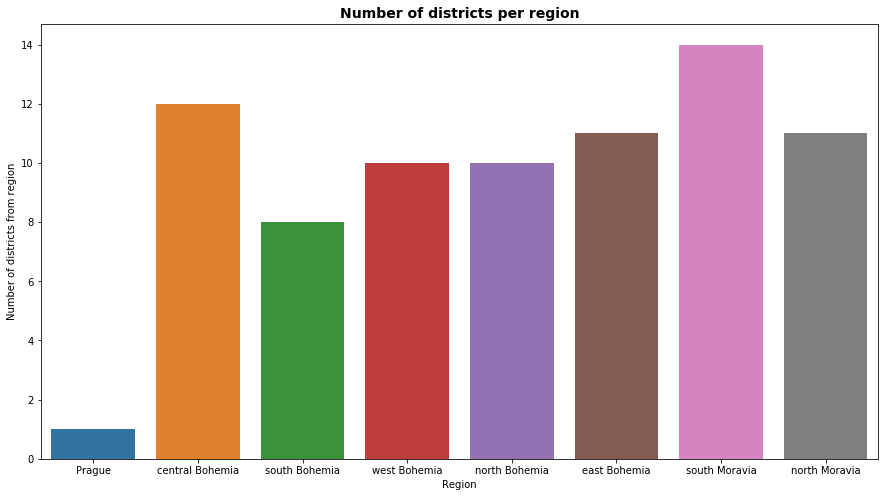

In [25]:
if show_graphs:
    plt.figure(figsize=(15,8))
    sb.countplot(x='region', data=district_data)
    plt.title("Number of districts per region", fontdict={'fontsize': 14, 'fontweight': 'bold'})
    plt.xlabel('Region');
    plt.ylabel('Number of districts from region');
    plt.show()

To study if the region might have an impact on the acceptance of the loan we will create a graph comparing the percentages of successful loans per region.

C:\Users\pedro\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


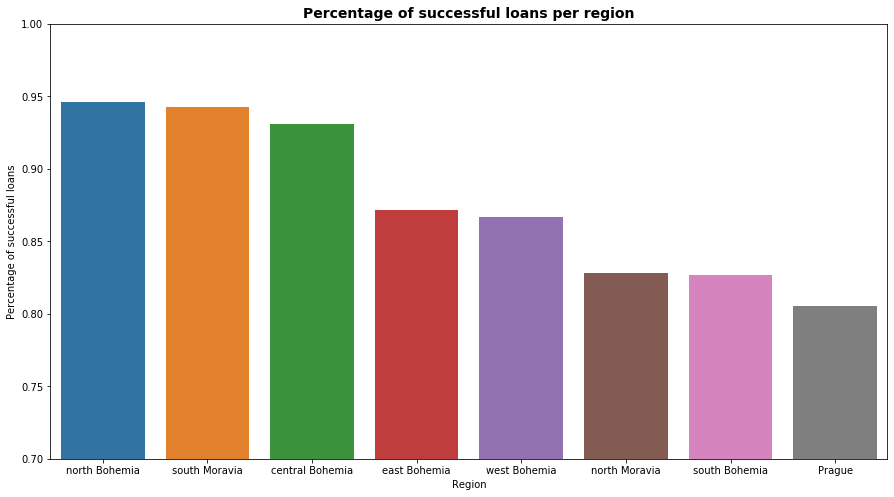

In [26]:
if show_graphs:
    district_data_region = district_data.copy()
    region_data = loan_train
    region_data = pd.merge(region_data, trans_train, on = 'account_id', suffixes = ('', '_trans'))
    region_data = pd.merge(region_data, account_data, on = 'account_id', suffixes = ('', '_account'))
    #train_data = train_data.dropna()
    region_data = pd.merge(region_data, district_data_region.set_index('code'), left_on = 'district_id', right_index = True, suffixes = ('', '_district'))

    region_total = region_data["region"].value_counts()
    tuples_total = [tuple((x, y)) for x, y in region_total.items()]

    regions_status_1 = region_data.loc[region_data['status'] == 1]
    region_total_1 = regions_status_1["region"].value_counts()
    tuples_total_1 = [tuple((x, y)) for x, y in region_total_1.items()]

    lista=[]
    for x in tuples_total:
        for y in tuples_total_1:
            if x[0]==y[0]:
                lista.append((x[0],x[1],y[1]))

    percentages = [(i[0],i[2] / i[1]) for i in lista]
    percentages.sort(key = lambda x: -x[1])

    x = [i[0] for i in percentages]
    y = [i[1] for i in percentages]

    plt.figure(figsize=(15,8))
    sb.barplot(x,y)
    plt.ylim(0.7, 1)
    plt.title("Percentage of successful loans per region", fontdict={'fontsize': 14, 'fontweight': 'bold'})
    plt.xlabel('Region');
    plt.ylabel('Percentage of successful loans');
    plt.show()


The *name* and the *region* of a **district** is not relevant to our analysis, as the *code* parameter is enough to identify a district. 

In [27]:
if not run_aggr:
    # Removing name and region from district
    district_data.drop(['name', 'region'], axis=1, inplace=True)

Now let's see the different values the parameter type can have.

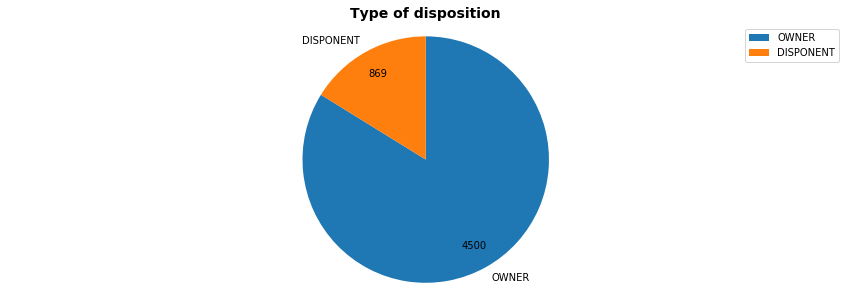

In [28]:
if show_graphs:
    disp_data_pie = disp_data.copy()

    ser = disp_data_pie.groupby('type')['type'].count()
    ser = ser.sort_values(ascending=False)
    ser = ser.iloc[[0,1]]

    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.pie(ser.values, labels=ser.index, startangle=90, autopct=lambda x:int(x/100.*ser.sum()+0.1), pctdistance=0.8, counterclock=False)
    ax.legend()
    plt.axis('equal')
    plt.title('Type of disposition', fontdict={'fontsize': 14, 'fontweight': 'bold'})
    fig.set_size_inches(15, 5)

Since only *OWNER* can issue permanent orders and ask for a loan, there is no interess in keeping this parameter in our dataset.

In [29]:
if not run_aggr:
    # only owner can issue permanent orders and ask for a loan
    disponents = disp_data.groupby(["account_id"],as_index=False,group_keys=False).agg({"type": [count_disponents]})
    disponents.columns = ['%s%s' % (a, '_%s' % b if b else '') for a, b in disponents.columns]
    disp_owners = disp_data[disp_data.type.eq('OWNER')]
    disp_owners.drop(['type'], axis=1, inplace=True)
    disp_owners = pd.merge(disp_owners, disponents, on = "account_id")

C:\Users\pedro\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


As *birth_number* column doesn't add any value to our model as it is in the original data (it's represented as an int in format YYMMDD for men and YYMM+50DD for women), let's put it in format YY-MM-DD and create a new column called *genre*.

In [30]:
if not run_aggr:
    client_data["birth_number"], client_data["genre"] = parse_client(client_data)
    client_data.head()

We can also see the *genre* distribution, where 1 means male and 0 female.

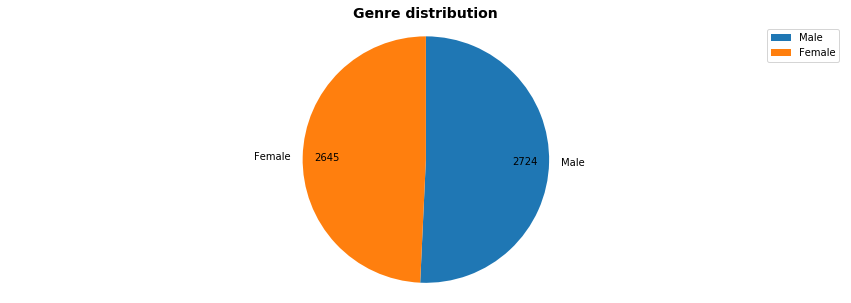

In [31]:
if show_graphs:
    client_data_genre_copy = client_data.copy()

    ser = client_data_genre_copy.groupby('genre')['genre'].count()
    ser = ser.sort_values(ascending=False)
    ser = ser.iloc[[0,1]]

    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.pie(ser.values, labels=["Male","Female"], startangle=90, autopct=lambda x:int(x/100.*ser.sum()+0.1), pctdistance=0.8, counterclock=False)
    ax.legend()
    plt.axis('equal')
    plt.title('Genre distribution', fontdict={'fontsize': 14, 'fontweight': 'bold'})
    fig.set_size_inches(15, 5)

[back](#index)
#### Transactions Data <a id="transactions-data"></a>

Let's look at null values distribution.

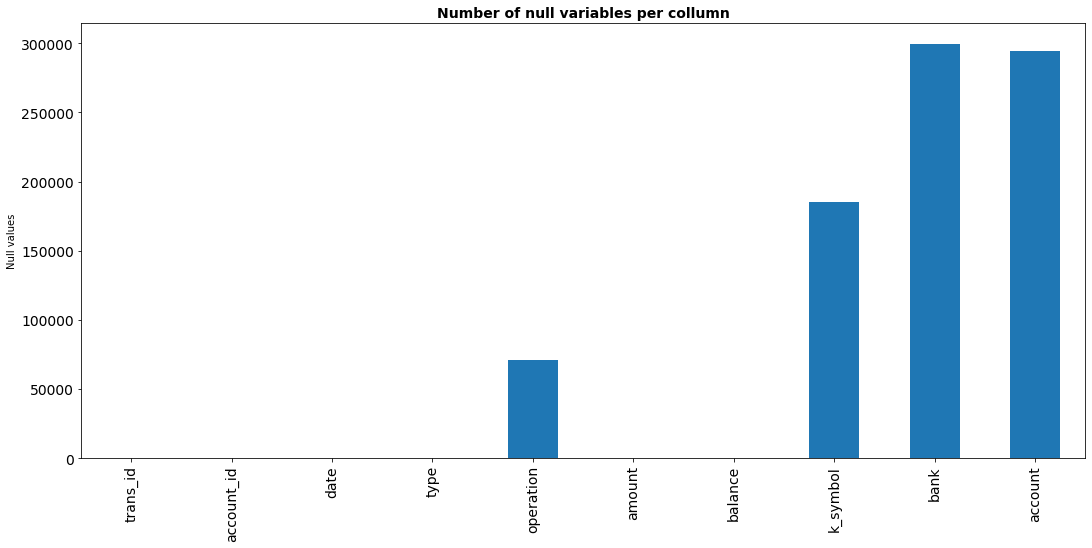

In [32]:
if show_graphs:
    # Null values for each attribute
    trans_train.isnull().sum().plot(kind='bar', figsize=(18,8), fontsize=14,);
    plt.title("Number of null variables per collumn", fontdict={'fontsize': 14, 'fontweight': 'bold'})
    plt.ylabel('Null values');

In [33]:
if show_graphs:
    print(trans_train.operation.value_counts())
    print('Null values: ' + str(trans_train.operation.isnull().sum()))
    print()
    print(trans_train.k_symbol.value_counts())
    print('Null values: ' + str(trans_train.k_symbol.isnull().sum()))
    print()
    print(trans_train.type.value_counts())
    print('Null values: ' + str(trans_train.type.isnull().sum()))
    print()

withdrawal in cash              165270
remittance to another bank       70737
credit in cash                   62202
collection from another bank     26505
credit card withdrawal            1210
Name: operation, dtype: int64
Null values: 70761

interest credited                        70761
payment for statement                    58377
household                                42839
                                         19065
old-age pension                          13502
insurrance payment                        6592
sanction interest if negative balance      305
Name: k_symbol, dtype: int64
Null values: 185244

withdrawal            232093
credit                159468
withdrawal in cash      5124
Name: type, dtype: int64
Null values: 0



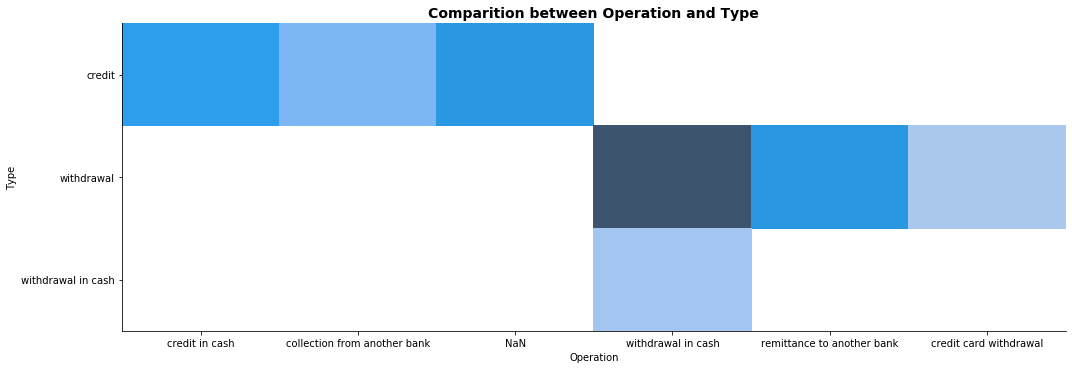

In [34]:
if show_graphs:
    trans_data_copy = trans_train.copy()
    trans_data_copy = trans_data_copy.loc[:, trans_data_copy.columns.intersection(['type','operation'])]
    trans_data_copy["operation"] = trans_data_copy["operation"].fillna('NaN')
    trans_data_copy.sort_values("operation")
    sb.displot(trans_data_copy,x='operation', y='type', aspect=3)
    plt.xlabel('Operation');
    plt.ylabel('Type');
    plt.title("Comparition between Operation and Type", fontdict={'fontsize': 14, 'fontweight': 'bold'})
    plt.show()

As we can see all the rows with operation *credit in cash* and *collection from another bank* are of type credit. All the *withdrawal in cash*, *remittance to another bank* and *credit cash withdrawal* operations are of the type *withdraw* or *withdrawal with cash* (in the case of the homonymous operation)

Looking for **type** column, let's convert all *withdrawal in cash* occurrences into *withdrawal*, as it is basically the same. 

In [35]:
if not run_aggr:
    trans_train.loc[trans_train['type'] == "withdrawal in cash", 'type'] = "withdrawal"
    trans_test.loc[trans_test['type'] == "withdrawal in cash", 'type'] = "withdrawal"

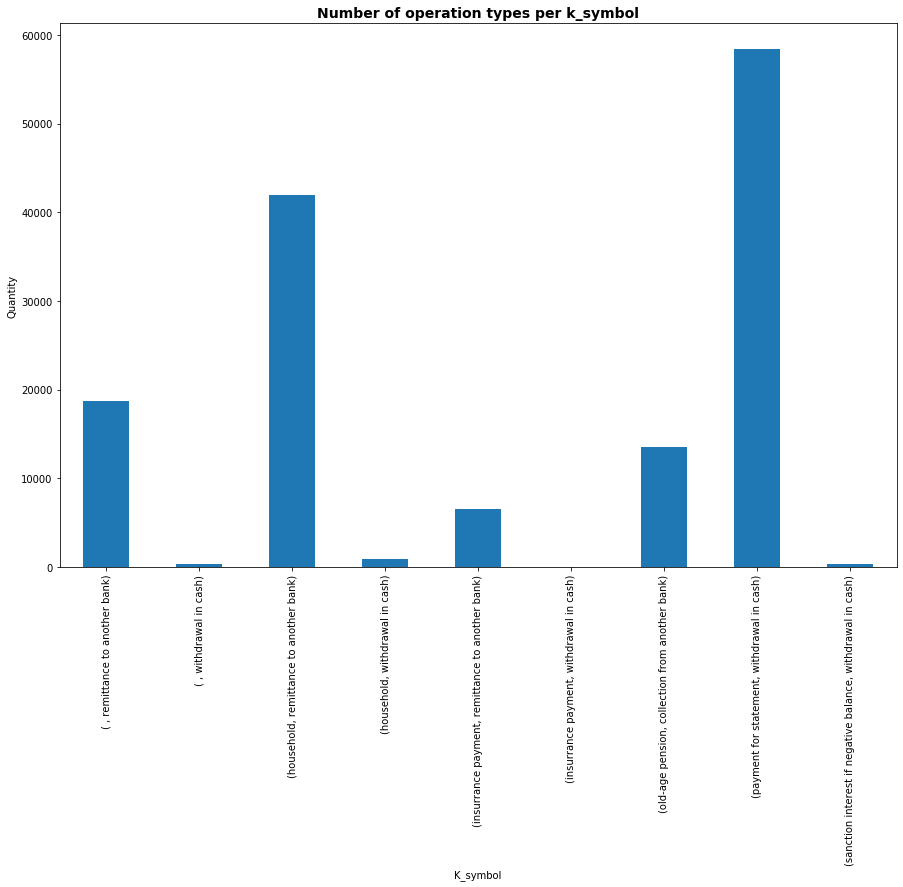

In [36]:
if show_graphs:
    trans_data_copy = trans_train.copy()
    trans_data_copy = trans_data_copy.groupby(['k_symbol', 'operation'])['operation'].count()

    plt.rcParams["figure.figsize"] = (15,10)
    trans_data_copy.plot(kind='bar', stacked=True)
    plt.xlabel('K_symbol');
    plt.ylabel('Quantity');
    plt.title("Number of operation types per k_symbol", fontdict={'fontsize': 14, 'fontweight': 'bold'})

    plt.show()

<Figure size 1080x720 with 0 Axes>

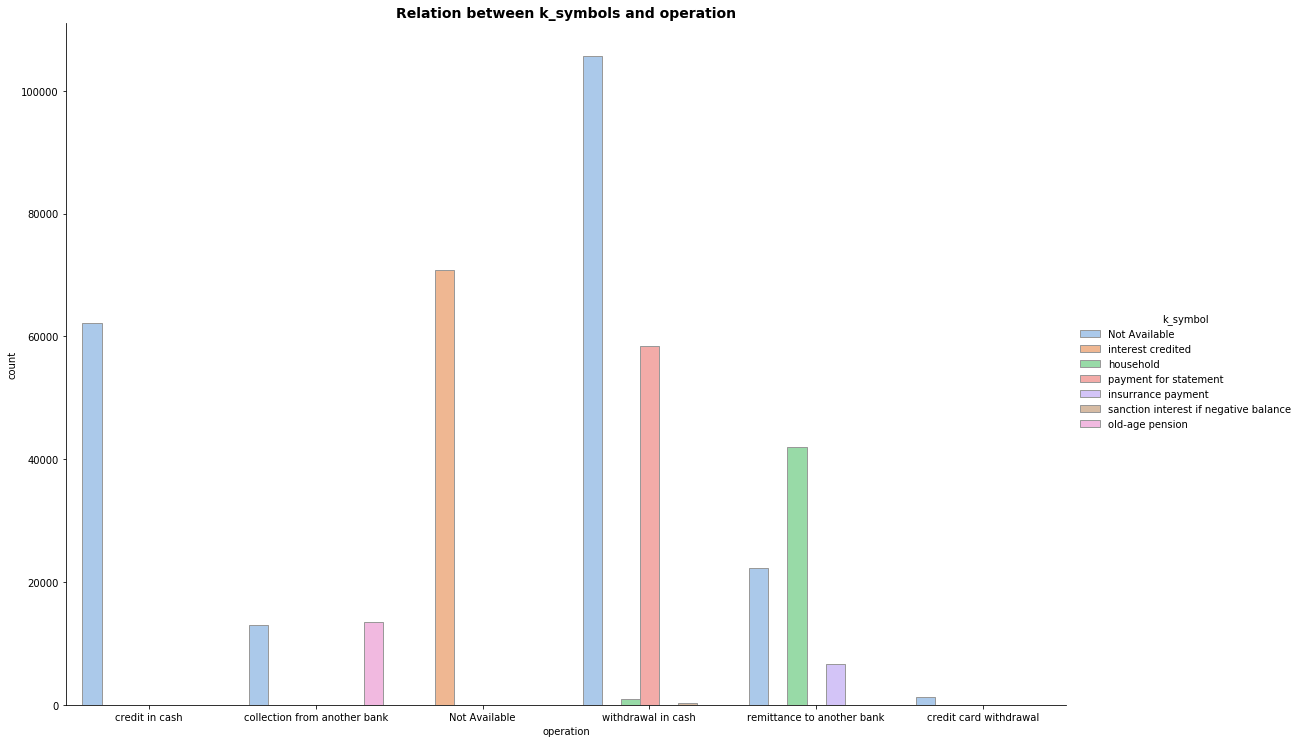

In [37]:
if show_graphs:
    trans_data_copy = trans_train.copy()
    trans_data_copy["operation"]=trans_data_copy["operation"].fillna("Not Available")
    trans_data_copy["k_symbol"]=trans_data_copy["k_symbol"].fillna("Not Available")
    trans_data_copy['k_symbol'] = trans_data_copy['k_symbol'].replace([' '],['Not Available'])
    trans_data_copy['operation'] = trans_data_copy['operation'].replace([''],['Not Available'])

    fig = plt.figure()

    sb.catplot(x="operation", hue="k_symbol", kind="count",
                palette="pastel", edgecolor=".6",
                data=trans_data_copy, height=10, aspect=1.5)
    plt.title('Relation between k_symbols and operation', fontdict={'fontsize': 14, 'fontweight': 'bold'})
    plt.ylim(0)
    plt.rcParams['figure.figsize']=(20,10)

    plt.show()


As we can see the great majority of the k_symbol types are directly related to a certain operation type.
All rows that have **operation** column with null value have *interested credited* in *k_symbol* column. We can try to replace the null values of *operation* column with the value that is in *k_symbol* column and then delete *k_symbol* parameter.

In [38]:
if not run_aggr:
    trans_train.loc[trans_train['operation'].isna(), 'operation'] = trans_train.loc[trans_train['operation'].isna(), 'k_symbol']
    trans_test.loc[trans_test['operation'].isna(), 'operation'] = trans_test.loc[trans_test['operation'].isna(), 'k_symbol']

    trans_train.drop(['k_symbol'], axis=1, inplace=True)
    trans_test.drop(['k_symbol'], axis=1, inplace=True)

As follows we can see the months when the most transfers were taken.

<Figure size 1440x720 with 0 Axes>

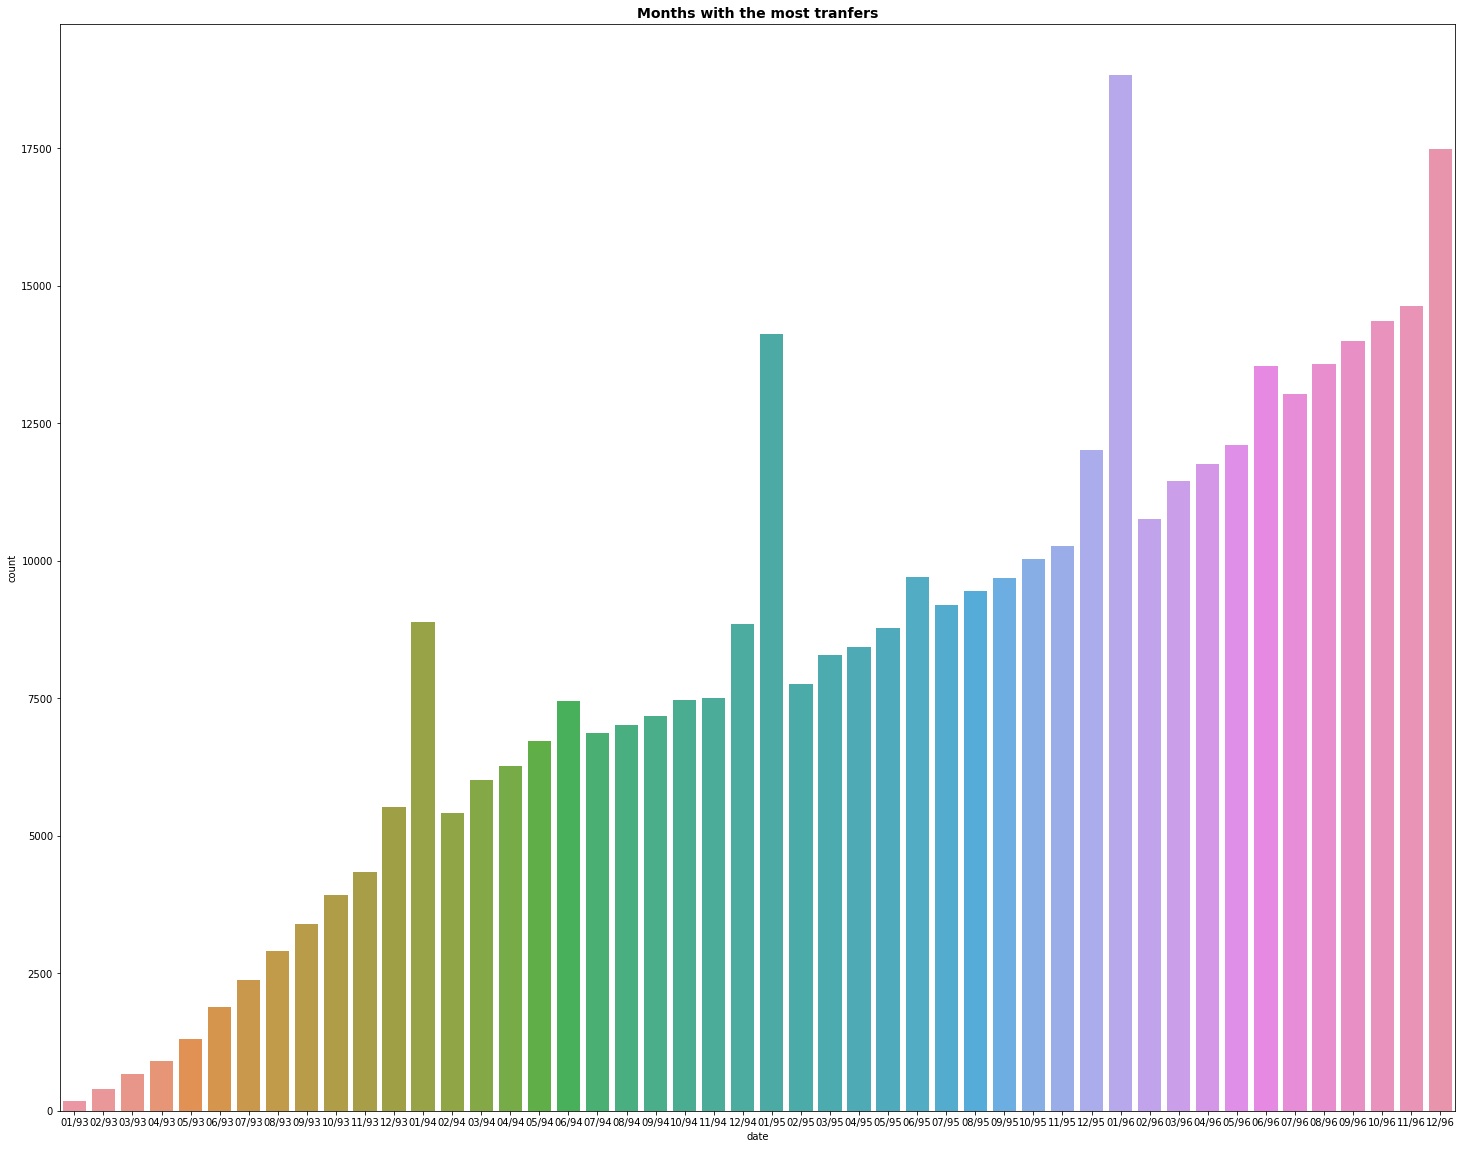

In [39]:
if show_graphs:
    trans_data_copy = trans_train.copy()
    trans_data_copy = trans_data_copy.sort_values('date')
    trans_data_copy = trans_data_copy.astype({'date': str})

    trans_data_copy['date'] = trans_data_copy['date'].apply(lambda x: get_month(x[0:4]))

    fig = plt.figure()
    plt.figure(figsize=(25,20))
    plt.title("Months with the most tranfers", fontdict={'fontsize': 14, 'fontweight': 'bold'})
    ax = sb.countplot(x="date", data=trans_data_copy)
    plt.show()

We can remove *bank* and *account* columns, as these columns only record the destination account and have too many null values. *date* column is not relevant to our analysis too.

In [40]:
if not run_aggr:
    trans_train.drop(['bank', 'account', 'date'], axis=1, inplace=True)
    trans_test.drop(['bank', 'account', 'date'], axis=1, inplace=True)

[back](#index)
#### District Data <a id="district-data"></a>

Let's look at null values distribution.

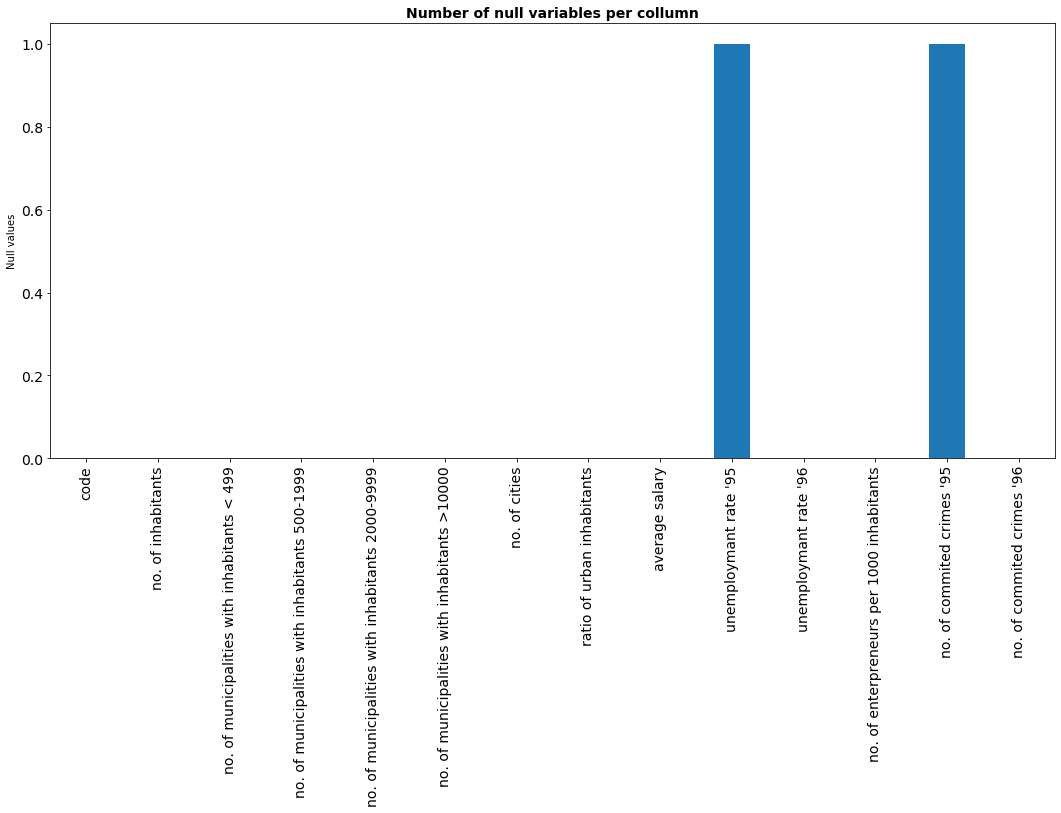

In [41]:
if show_graphs:
    # Null values for each attribute
    district_data.isnull().sum().plot(kind='bar', figsize=(18,8), fontsize=14,);
    plt.title("Number of null variables per collumn", fontdict={'fontsize': 14, 'fontweight': 'bold'})
    plt.ylabel('Null values');

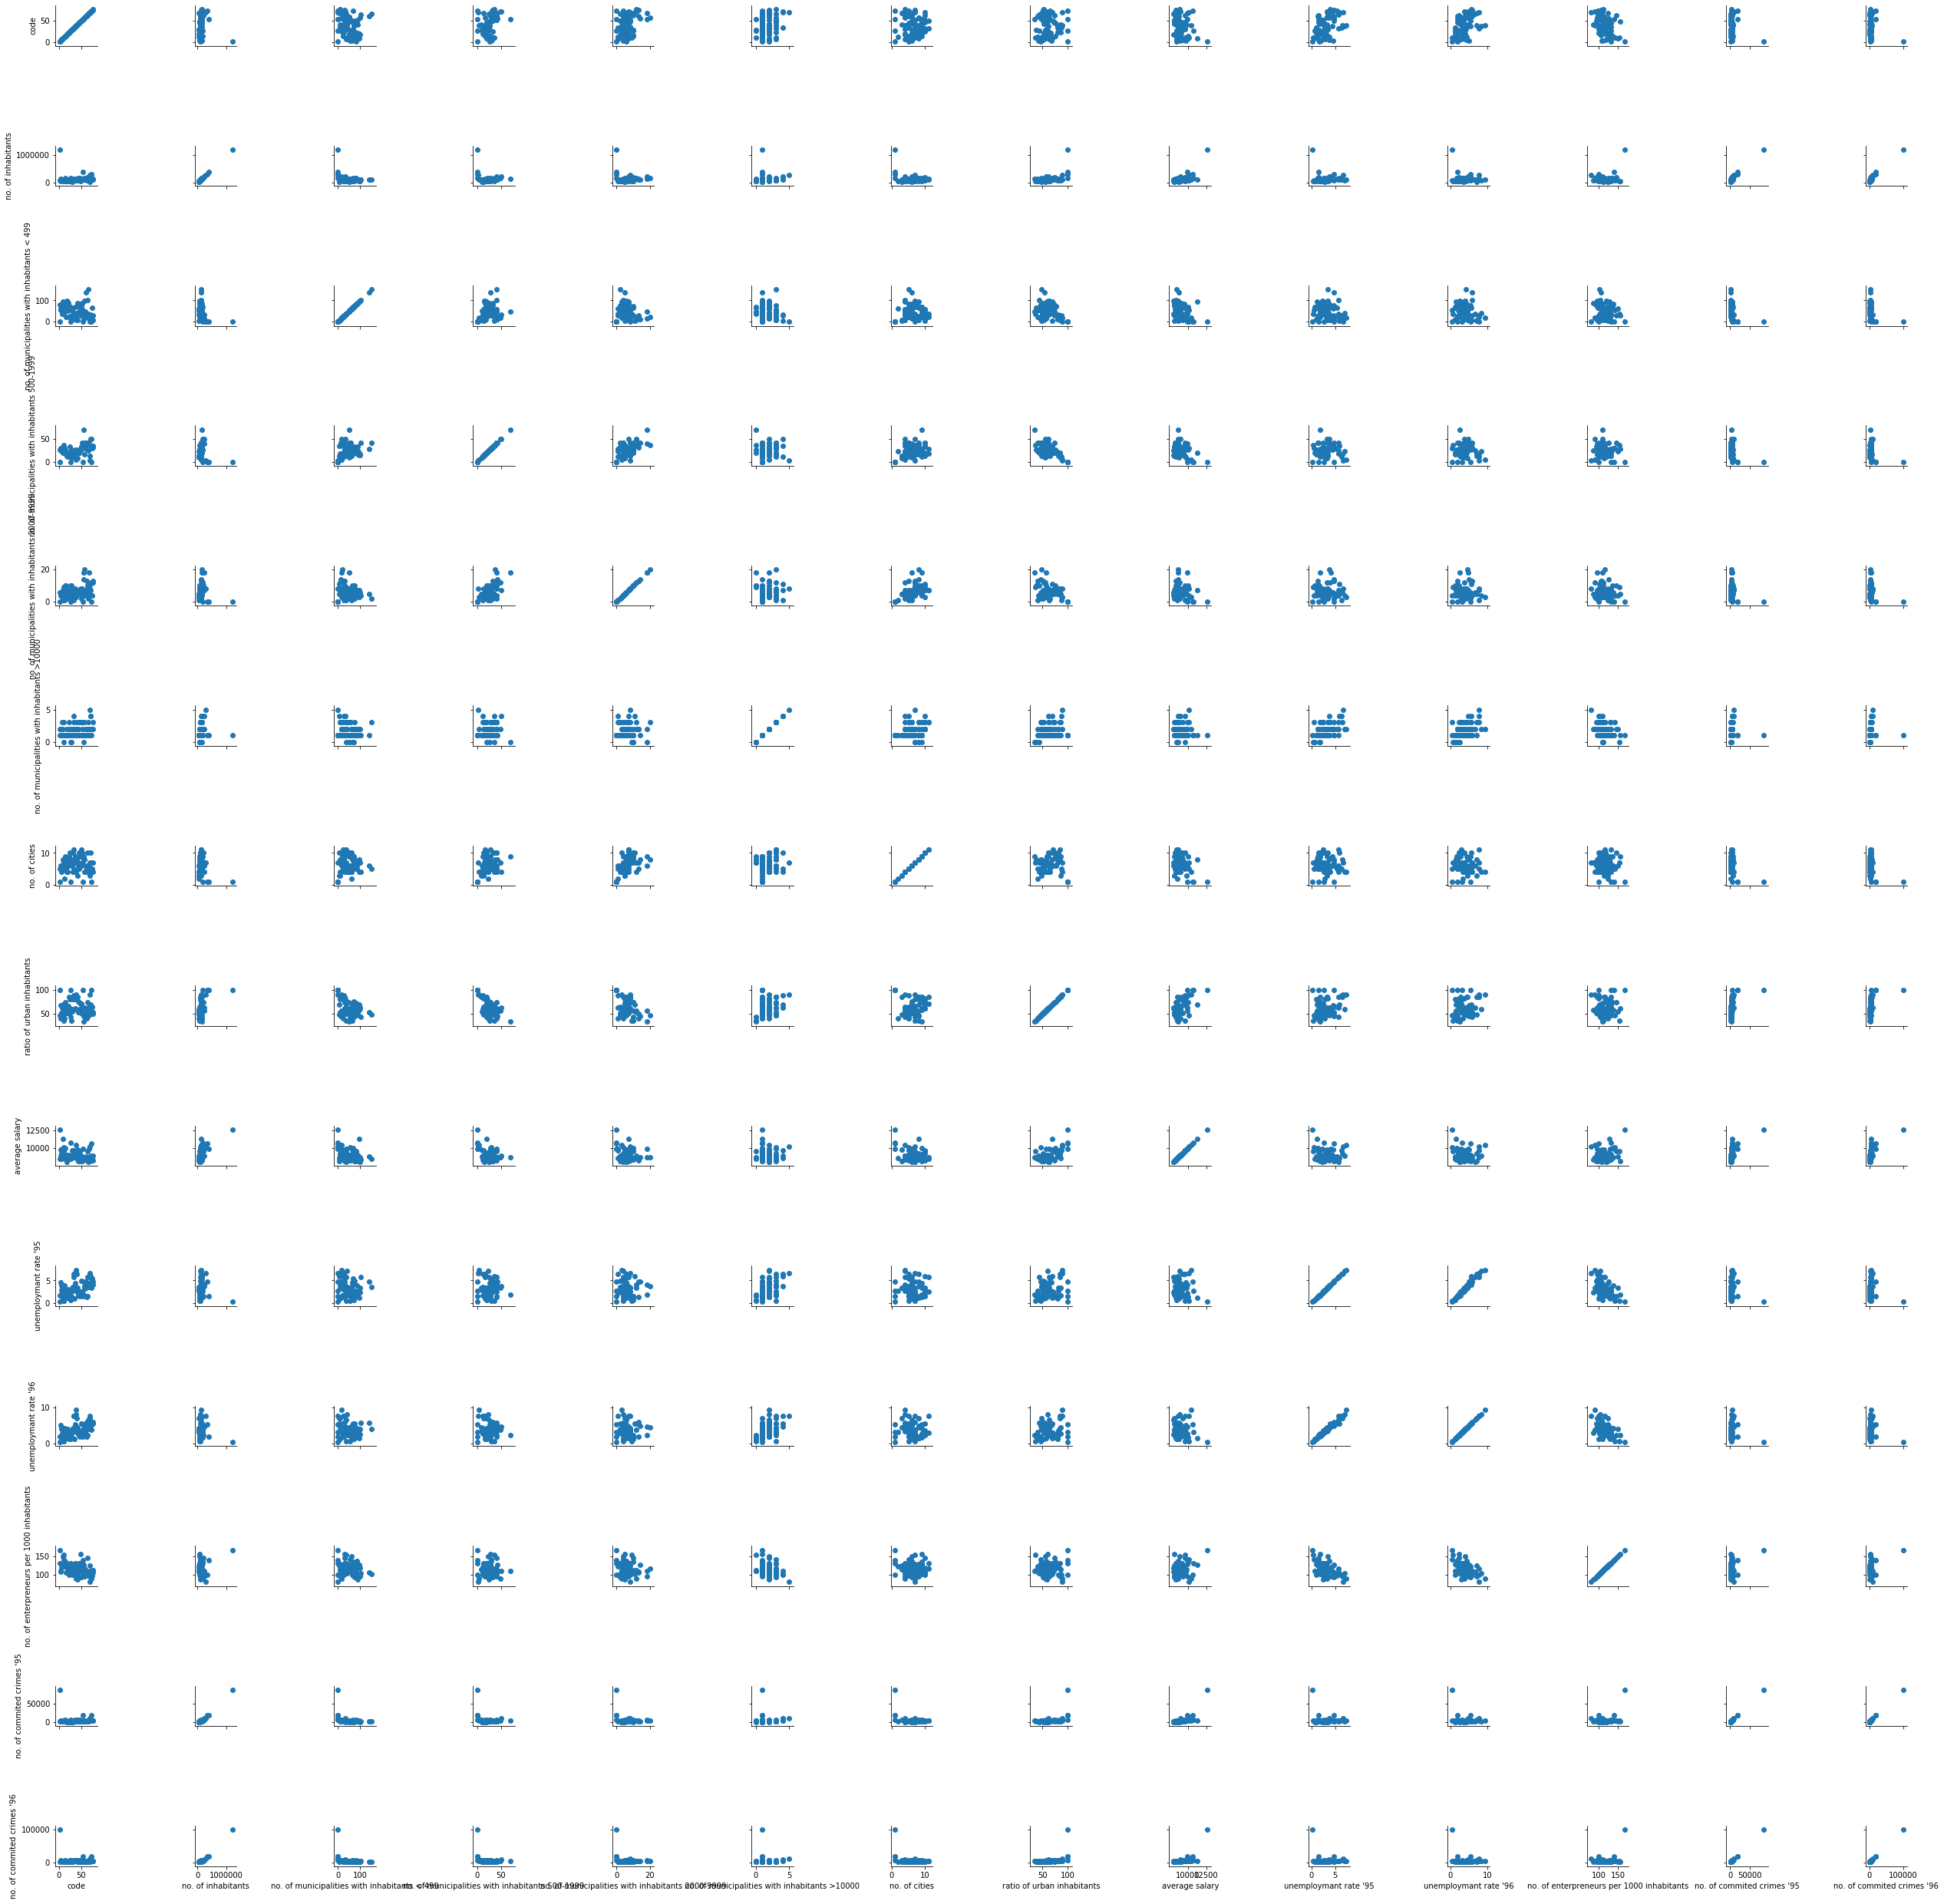

In [42]:
if show_graphs:
    district_scatter_plot = sb.PairGrid(district_data)
    district_scatter_plot.map(plt.scatter)

*unemploymant rate in '95* and *no. of commited crimes '95* have a null value each. Let's look at the distribution of these columns.

C:\Users\pedro\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\pedro\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


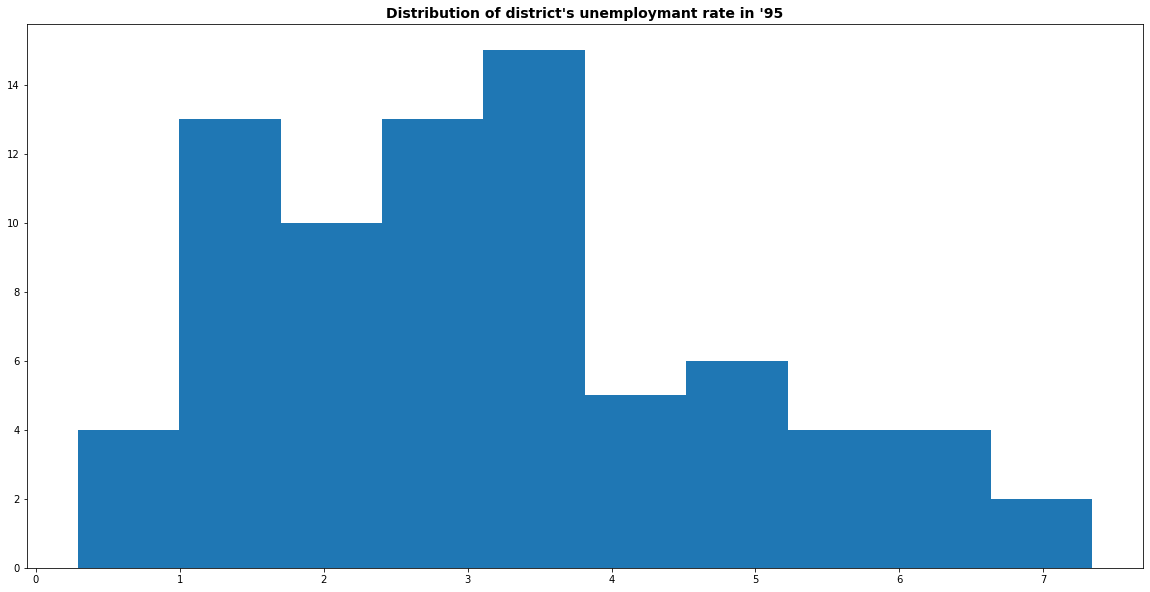

In [43]:
if show_graphs:
    plt.figure(figsize=(20,10))
    plt.title('Distribution of district\'s unemploymant rate in \'95', fontdict={'fontsize': 14, 'fontweight': 'bold'})
    plt.hist(district_data['unemploymant rate \'95'])

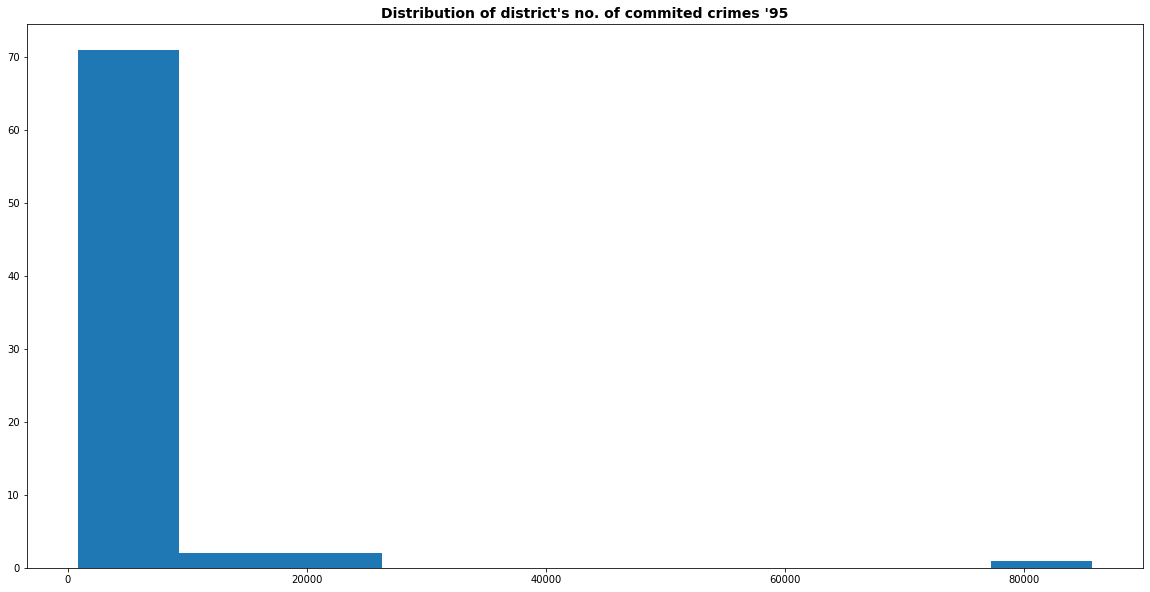

In [44]:
if show_graphs:
    plt.figure(figsize=(20,10))
    plt.title('Distribution of district\'s no. of commited crimes \'95', fontdict={'fontsize': 14, 'fontweight': 'bold'})
    plt.hist(district_data['no. of commited crimes \'95'])

Let's fill null values in in district's *unemploymant rate in '95* and *district's no. of commited crimes '95* with median and mean values of the column, respectively.

In [45]:
if not run_aggr:
    district_data['unemploymant rate \'95'].fillna(district_data['unemploymant rate \'95'].median(), inplace=True)

    district_data['no. of commited crimes \'95'].fillna(district_data['no. of commited crimes \'95'].mean(), inplace=True)

[back](#index)
#### Card Data <a id="card-data"></a>

Let's look at null values distribution.

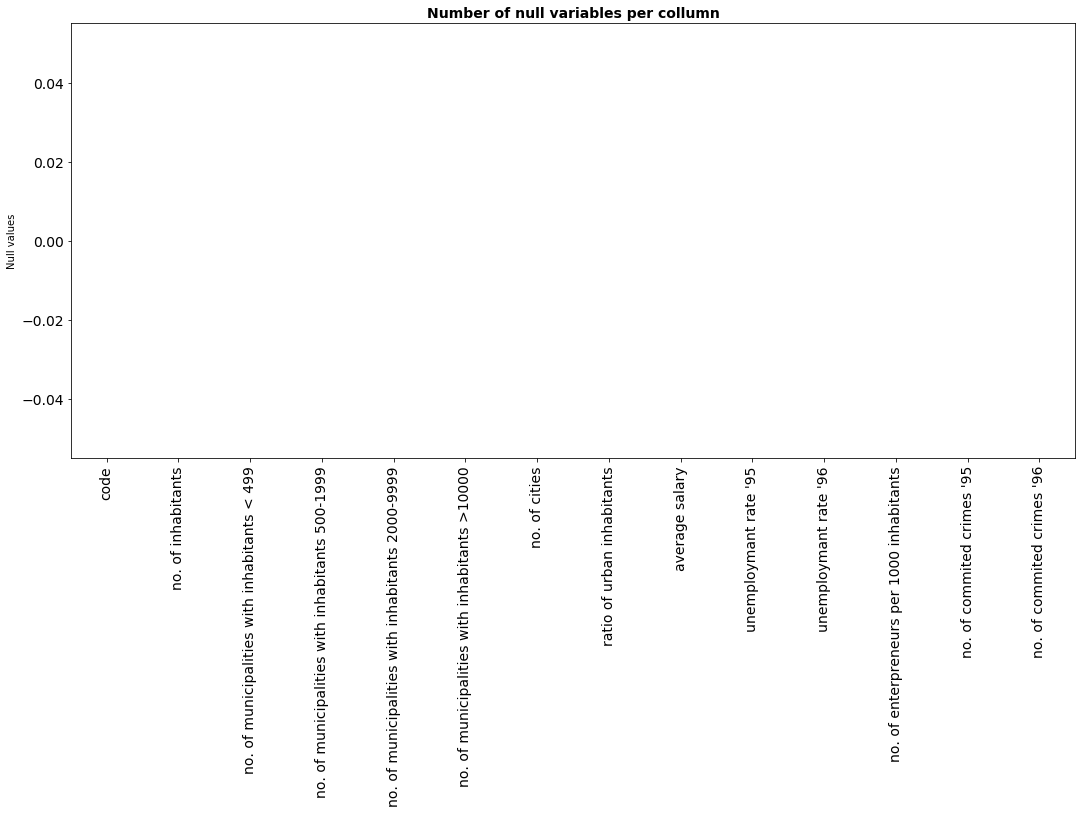

In [46]:
if show_graphs:
    # Null values for each attribute
    district_data.isnull().sum().plot(kind='bar', figsize=(18,8), fontsize=14,);
    plt.title("Number of null variables per collumn", fontdict={'fontsize': 14, 'fontweight': 'bold'})
    plt.ylabel('Null values');

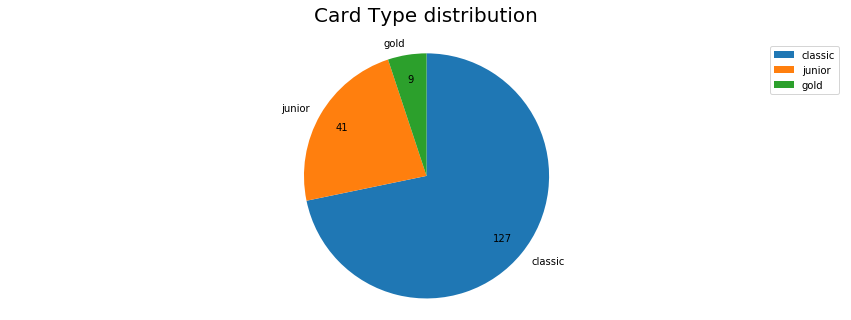

In [47]:
if show_graphs:
    card_data_copy = card_train.copy()

    ser = card_data_copy.groupby('type')['type'].count()
    ser = ser.sort_values(ascending=False)
    ser = ser.iloc[[0,1,2]]

    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.pie(ser.values, labels=ser.index, startangle=90, autopct=lambda x:int(x/100.*ser.sum()+0.1), pctdistance=0.8, counterclock=False)
    ax.legend()
    plt.axis('equal')
    plt.title('Card Type distribution', y=1.05, fontsize=20)
    fig.set_size_inches(15, 5)

#### [back](#index)
#### Data Exploration <a class="anchor" id="data-exploration"></a>

In [48]:
def plot_loan_duration(train_data):
    if show_graphs:
        plt.figure(figsize=(15,10))
        ax = sb.barplot(train_data["duration"], train_data["amount"])
        plt.xlabel('Duration');
        plt.ylabel('Amount');
        plt.title('Loan duration compared the amount', fontdict={'fontsize': 14, 'fontweight': 'bold'})
        plt.show()

We can clearly see that with bigger loan amounts the time taken to repay them is exponentially higher.

In [49]:
def plot_number_payments(train_data):
    if show_graphs:
        plt.rcParams["figure.figsize"] = (15,10)
        ax = plt.plot(train_data["amount"], train_data["payments"], linestyle='none', marker='o', alpha=0.3)
        plt.title('Number of payments per different amount', fontdict={'fontsize': 14, 'fontweight': 'bold'})
        plt.xlabel('Amount');
        plt.ylabel('Payments');
        plt.show()

As we can check by the values in the graph, it seems that the number of payments is defined by the bank since the results are very linear and follow a line according to the amount loaned.

In [50]:
def plot_distribution_amount(train_data):
    if show_graphs:
        plt.figure(figsize=(20,10))
        #ax = sb.barplot(train_data["amount_trans"], train_data["balance"])
        plt.plot(train_data["balance_mean"],train_data["amount_mean"], 'o', color='green');
        plt.title('Distribution of tranfer amount by balance', fontdict={'fontsize': 14, 'fontweight': 'bold'})
        plt.ylabel('Transfer Amount');
        plt.xlabel('Balance');

        plt.show()

As we can see as the balance increases the transfer amount also increase and is rarely higher than the balance. It can also be seen that a straight continous line exists with gradient 1. This means the amount of some transfers are actually correspondent, or close, to the total amount in the account.

In [51]:
def plot_cities_success(train_data):
    if show_graphs:
        train_data_copy = train_data.copy()
        train_data_copy = train_data_copy.astype({'status': str})
        train_data_copy['status'] = train_data_copy['status'].replace(['1.0','-1.0'],['Successful Loan','Unsuccessful Loan'])

        train_data_copy = train_data_copy.groupby(['no. of cities', 'status'])['status'].count().unstack().fillna(0)

        plt.rcParams["figure.figsize"] = (15,10)
        train_data_copy.plot(kind='bar', stacked=True)
        plt.title("Number of cities per district and loan success rate", fontdict={'fontsize': 14, 'fontweight': 'bold'})
        plt.show()

In [52]:
def plot_inhabitants_success(train_data):
    if show_graphs:
        train_data_copy = train_data.copy()

        train_data_copy = train_data_copy.astype({'status': str})
        train_data_copy['status'] = train_data_copy['status'].replace(['1.0','-1.0'],['Successful Loan','Unsuccessful Loan'])

        fig = plt.figure()
        sb.violinplot(y=train_data_copy["no. of inhabitants"], x=train_data_copy["status"])
        plt.title('Influence of number of inhabitants in loan success', fontdict={'fontsize': 14, 'fontweight': 'bold'})
        plt.ylim(0)
        fig.set_size_inches(15, 15)
        plt.show()

In [53]:
def plot_success_decade(train_data):
    if show_graphs:
        train_data_copy = train_data.copy()

        train_data_copy = train_data_copy.astype({'age_loan': str})

        train_data_copy['age_loan'] = train_data_copy['age_loan'].apply(lambda x: get_decade(x))

        train_data_copy = train_data_copy.astype({'status': str})
        train_data_copy['status'] = train_data_copy['status'].replace(['1.0','-1.0'],['Successful Loan','Unsuccessful Loan'])

        train_data_copy = train_data_copy.groupby(['age_loan', 'status'])['status'].count().unstack().fillna(0)

        plt.rcParams["figure.figsize"] = (15,10)
        train_data_copy.plot(kind='bar', stacked=True)
        plt.title("Loan success rate per decade of age", fontdict={'fontsize': 14, 'fontweight': 'bold'})
        plt.show()

In [54]:
def plot_success_decade_genre(train_data):
    if show_graphs:
        train_data_copy = train_data.copy()

        train_data_copy = train_data_copy.astype({'status': str})
        train_data_copy['status'] = train_data_copy['status'].replace(['1.0','-1.0'],['Successful Loan','Unsuccessful Loan'])

        train_data_copy = train_data_copy.groupby(['genre', 'status'])['status'].count().unstack().fillna(0)

        plt.rcParams["figure.figsize"] = (15,10)
        train_data_copy.plot(kind='bar', stacked=True)
        plt.title("Loan success rate per decade of genre", fontdict={'fontsize': 14, 'fontweight': 'bold'})
        plt.show()

In [55]:
def plot_amount_age_genre(train_data):
    if show_graphs:
        plt.figure(figsize=(15,10))

        train_data_names = train_data.copy()
        train_data_names["genre"] = train_data_names["genre"].astype(str)
        train_data_names["genre"].replace({"1": "Male" , "0": "Female"}, inplace=True)

        sb.scatterplot(train_data_names["amount"],train_data_names["age_loan"],train_data_names["genre"], alpha=0.5, sizes=(10, 1000), hue="time")
        plt.xlabel("Amount")
        plt.ylabel("Age")
        plt.title("Amount by age and genre", fontdict={'fontsize': 14, 'fontweight': 'bold'})
        plt.show()

In [56]:
def plot_amount_age(train_data):
    if show_graphs:
        train_data_names = train_data.copy()

        train_data_names = train_data_names.astype({'age_loan': str})

        train_data_names['age_loan'] = train_data_names['age_loan'].apply(lambda x: get_decade(x))

        train_data_names = train_data_names.sort_values('age_loan')

        plt.figure(figsize=(15,10))

        sb.boxplot(x=train_data_names["age_loan"], y=train_data_names["amount"])
        plt.title("Loan amount by age", fontdict={'fontsize': 14, 'fontweight': 'bold'})
        plt.show()

In [57]:
def plot_date_amount_age(train_data):
    if show_graphs:
        train_data_ages = train_data.copy()

        train_data_ages = train_data_ages.astype({'age_loan': str})

        train_data_ages['age_loan'] = train_data_ages['age_loan'].apply(lambda x: get_decade(x))

        train_data_ages = train_data_ages.astype({'age_account': str})

        train_data_ages['age_account'] = train_data_ages['age_account'].apply(lambda x: get_decade(x))

        train_data_names = train_data_ages.sort_values('age_loan')
        sb.barplot(x='age_account', y='amount', hue='age_loan', data=train_data_ages, saturation=0.8)
        plt.title("Date of creation of account compared to amount and age when the loan was made", fontdict={'fontsize': 14, 'fontweight': 'bold'})
        plt.show()

In [58]:
def plot_balance_amount_age(train_data):
    if show_graphs:
        train_data_ages = train_data.copy()

        train_data_ages = train_data_ages.astype({'age_loan': str})

        train_data_ages['age_loan'] = train_data_ages['age_loan'].apply(lambda x: get_decade(x))

        train_data_balance = train_data_ages.astype({'balance_mean': str})

        train_data_balance['balance'] = train_data_balance['balance_mean'].apply(lambda x: get_balance(x))

        train_data_balance = train_data_balance.sort_values('balance_mean')
        sb.boxplot(x='balance', y='amount', hue='age_loan', data=train_data_balance, saturation=0.8)
        plt.title("Balance and amount of loan by age", fontdict={'fontsize': 14, 'fontweight': 'bold'})
        plt.show()

In [59]:
def plot_salary_age_district(train_data):
    if show_graphs:
        plt.figure(figsize=(15,10))

        train_data_names = train_data.copy()
        train_data_names["genre"] = train_data_names["genre"].astype(str)
        train_data_names["genre"].replace({"1": "Male" , "0": "Female"}, inplace=True)

        sb.scatterplot(train_data_names["average salary"],train_data_names["age_loan"],train_data_names["district_id"], alpha=0.5, sizes=(10, 1000), hue="time")
        plt.xlabel("Average Salary")
        plt.ylabel("Age")
        plt.title("Average Salary by age and district", fontdict={'fontsize': 14, 'fontweight': 'bold'})
        plt.show()

As follows we can see the average salary by age.

In [60]:
def plot_average_decade(train_data):
    if show_graphs:
        train_data_copy = train_data.copy()
        train_data_copy = train_data_copy.astype({'age_loan': str})

        train_data_copy['age_loan'] = train_data_copy['age_loan'].apply(lambda x: get_decade(x))

        train_data_copy = train_data_copy.sort_values('age_loan')
        train_data_copy["average salary"] = train_data_copy["average salary"].astype(float)

        fig = plt.figure()
        sb.boxplot(x=train_data_copy["age_loan"], y=train_data_copy["average salary"])
        plt.xlabel('age_loan', y=1.05, fontsize=15, labelpad=15)
        plt.ylabel('average salary', x=0.7, fontsize=15, labelpad=15)
        plt.title('Average salary per decade of age', fontdict={'fontsize': 14, 'fontweight': 'bold'})
        fig.set_size_inches(15, 10)
        plt.show()

In [61]:
def plot_average_genre(train_data):
    if show_graphs:
        train_data_copy = train_data.copy()
        train_data_copy["genre"] = train_data_copy["genre"].astype(str)
        train_data_copy["genre"].replace({"0": "Female","1": "Male"}, inplace=True)

        plt.figure(figsize=(15,10))
        plt.ylim(9000, 10000)
        sb.barplot(x = train_data_copy["genre"], y = train_data_copy["average salary"])
        plt.title("Average Salary by genre", fontdict={'fontsize': 14, 'fontweight': 'bold'})
        # display
        plt.show()

[back](#index)
#### Dataset Managing <a id="dataset"></a>

In [62]:
if not run_aggr:
    loan_train_plot, district_data_train_plot, client_data_train_plot, card_train_plot, trans_train_plot, account_data_train_plot, disp_data_train_plot = loan_train.copy(), district_data.copy(), client_data.copy(), card_train.copy(), trans_train.copy(), account_data.copy(), disp_owners.copy()

In [63]:
if not run_aggr:
    loan_test_plot, district_data_test_plot, client_data_test_plot, card_test_plot, trans_test_plot, account_data_test_plot, disp_data_test_plot = loan_test.copy(), district_data.copy(), client_data.copy(), card_test.copy(), trans_test.copy(), account_data.copy(), disp_owners.copy()

Call the merge and aggregate function for both the train and test data

In [64]:
if not run_aggr:
    train_data = merge_aggr_dataset_plots(loan_train_plot, district_data_train_plot, client_data_train_plot, card_train_plot, trans_train_plot, account_data_train_plot, disp_data_train_plot)
else:
    train_data = merge_aggr_dataset(loan_train_aggr, district_data_train_aggr, client_data_train_aggr, card_train_aggr, trans_train_aggr, account_data_train_aggr, disp_data_train_aggr)

C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: Degrees of freedom <= 0 for slice
  
C:\Users\pedro\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\pedro\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: Degrees of freedom <= 0 for slice
  after removing the cwd from sys.path.
C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: Degrees of freedom <= 0 for slice
  
C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: Degrees of freedom <= 0 for slice
  
C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: Degrees of freedom <= 0 for slice
  # Remove the CWD from sys.path w

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328 entries, 0 to 327
Data columns (total 78 columns):
loan_id                                             328 non-null float64
account_id                                          328 non-null float64
date                                                328 non-null float64
amount                                              328 non-null float64
duration                                            328 non-null float64
payments                                            328 non-null float64
status                                              328 non-null float64
operation_count                                     328 non-null float64
operation_count_credit_cash                         328 non-null float64
operation_count_collect                             328 non-null float64
operation_count_with_cash                           328 non-null float64
operation_count_remi                                328 non-null float64
operation_count_wit

In [65]:
if not run_aggr:
    test_data = merge_aggr_dataset_plots(loan_test_plot, district_data_test_plot, client_data_test_plot, card_test_plot, trans_test_plot, account_data_test_plot, disp_data_test_plot)
else:
    test_data = merge_aggr_dataset(loan_test_aggr, district_data_test_aggr, client_data_test_aggr, card_test_aggr, trans_test_aggr, account_data_test_aggr, disp_data_test_aggr)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 0 to 353
Data columns (total 78 columns):
loan_id                                             354 non-null int64
account_id                                          354 non-null int64
date                                                354 non-null int64
amount                                              354 non-null int64
duration                                            354 non-null int64
payments                                            354 non-null int64
status                                              0 non-null float64
operation_count                                     354 non-null int64
operation_count_credit_cash                         354 non-null int64
operation_count_collect                             354 non-null int64
operation_count_with_cash                           354 non-null int64
operation_count_remi                                354 non-null int64
operation_count_with_card                  

In [66]:
if not run_aggr:
    card_train["hasCard"] = card_train["card_id"].fillna(0)
    card_train.loc[card_train["hasCard"] != 0, "hasCard"] = 1
    card_train["hasCard"] = card_train["hasCard"].astype(bool)
    
    card_test["hasCard"] = card_test["card_id"].fillna(0)
    card_test.loc[card_test["hasCard"] != 0, "hasCard"] = 1
    card_test["hasCard"] = card_test["hasCard"].astype(bool)

Now we can create a column *age_loan* where we will keep the age of the client at the time of the requested loan.

In [67]:
if not run_aggr:
    train_data["age_loan"] = parse_dates(train_data, "date", "birth_number")
    test_data["age_loan"] = parse_dates(test_data, "date", "birth_number")

Also, let's create a new column that represents the age of each client when he creates the account (*age_account*).

In [68]:
if not run_aggr:
    train_data["age_account"] = parse_dates(train_data, "date_account", "birth_number")
    test_data["age_account"] = parse_dates(test_data, "date_account", "birth_number")

Now, let's simplify *age_loan* and *age_account* values, converting them into age ranges divided by decades.

In [69]:
if not run_aggr:
    train_data["age_loan_range"] = parse_date_ranges(train_data, "age_loan")
    test_data["age_loan_range"] = parse_date_ranges(test_data, "age_loan")

    train_data["age_account_range"] = parse_date_ranges(train_data, "age_account")
    test_data["age_account_range"] = parse_date_ranges(test_data, "age_account")

<Figure size 1440x720 with 0 Axes>

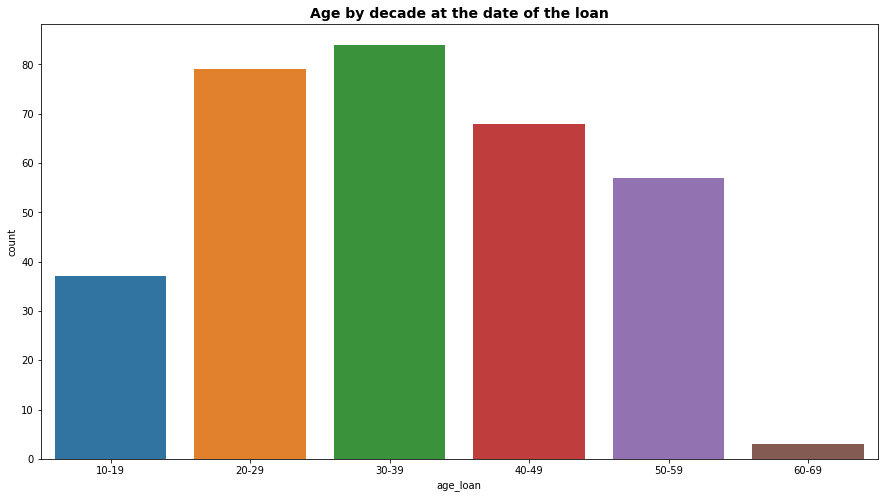

In [70]:
if show_graphs:
    train_data_copy = train_data.copy()

    train_data_copy = train_data_copy.astype({'status': str})
    train_data_copy['status'] = train_data_copy['status'].replace(['1.0','-1.0'],['Successful Loan','Unsuccessful Loan'])

    fig = plt.figure()
    sb.violinplot(y=train_data_copy["no. of inhabitants"], x=train_data_copy["status"])
    plt.title('Influence of number of inhabitants in loan success', fontdict={'fontsize': 14, 'fontweight': 'bold'})
    plt.ylim(0)
    fig.set_size_inches(15, 15)
    plt.show()

In [ ]:
train_data.info()

In [ ]:
if show_graphs:
    train_data_copy = train_data.copy()

    train_data_copy = train_data.copy()
    train_data_copy = train_data_copy.astype({'age_loan': str})

    train_data_copy['age_loan'] = train_data_copy['age_loan'].apply(lambda x: get_decade(x))

    train_data_copy = train_data_copy.sort_values('age_loan')

    fig = plt.figure()
    plt.figure(figsize=(15,8))
    plt.title("Age by decade at the date of the loan", fontdict={'fontsize': 14, 'fontweight': 'bold'})
    ax = sb.countplot(x="age_loan", data=train_data_copy)

    plt.show()

Now we can see the months when the accounts were created.

<Figure size 1440x720 with 0 Axes>

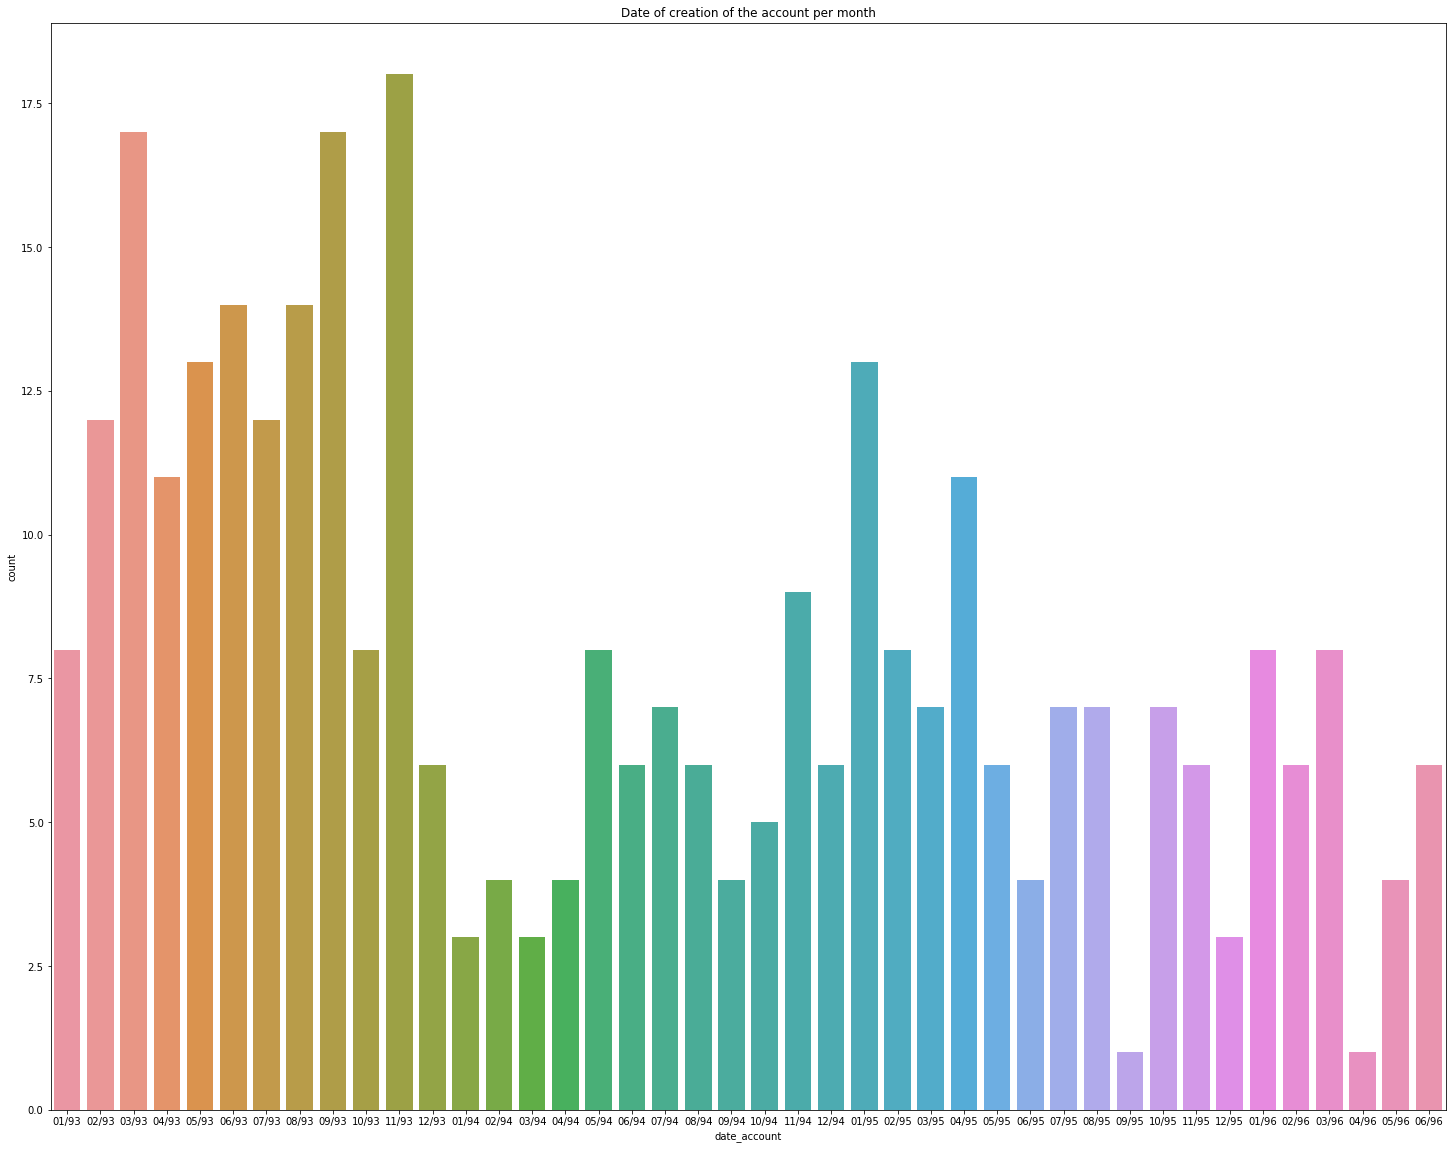

In [71]:
if show_graphs:
    train_data_copy = train_data.copy()
    train_data_copy = train_data_copy.sort_values('date_account')
    train_data_copy = train_data_copy.astype({'date_account': str})

    train_data_copy['date_account'] = train_data_copy['date_account'].apply(lambda x: get_month(x[0:4]))

    fig = plt.figure()
    plt.figure(figsize=(25,20))
    plt.title("Date of creation of the account per month")
    ax = sb.countplot(x="date_account", data=train_data_copy)

    plt.show()

We can also see the month and year of when the loans were created and their relation to the number of successful loans.

<Figure size 1440x720 with 0 Axes>

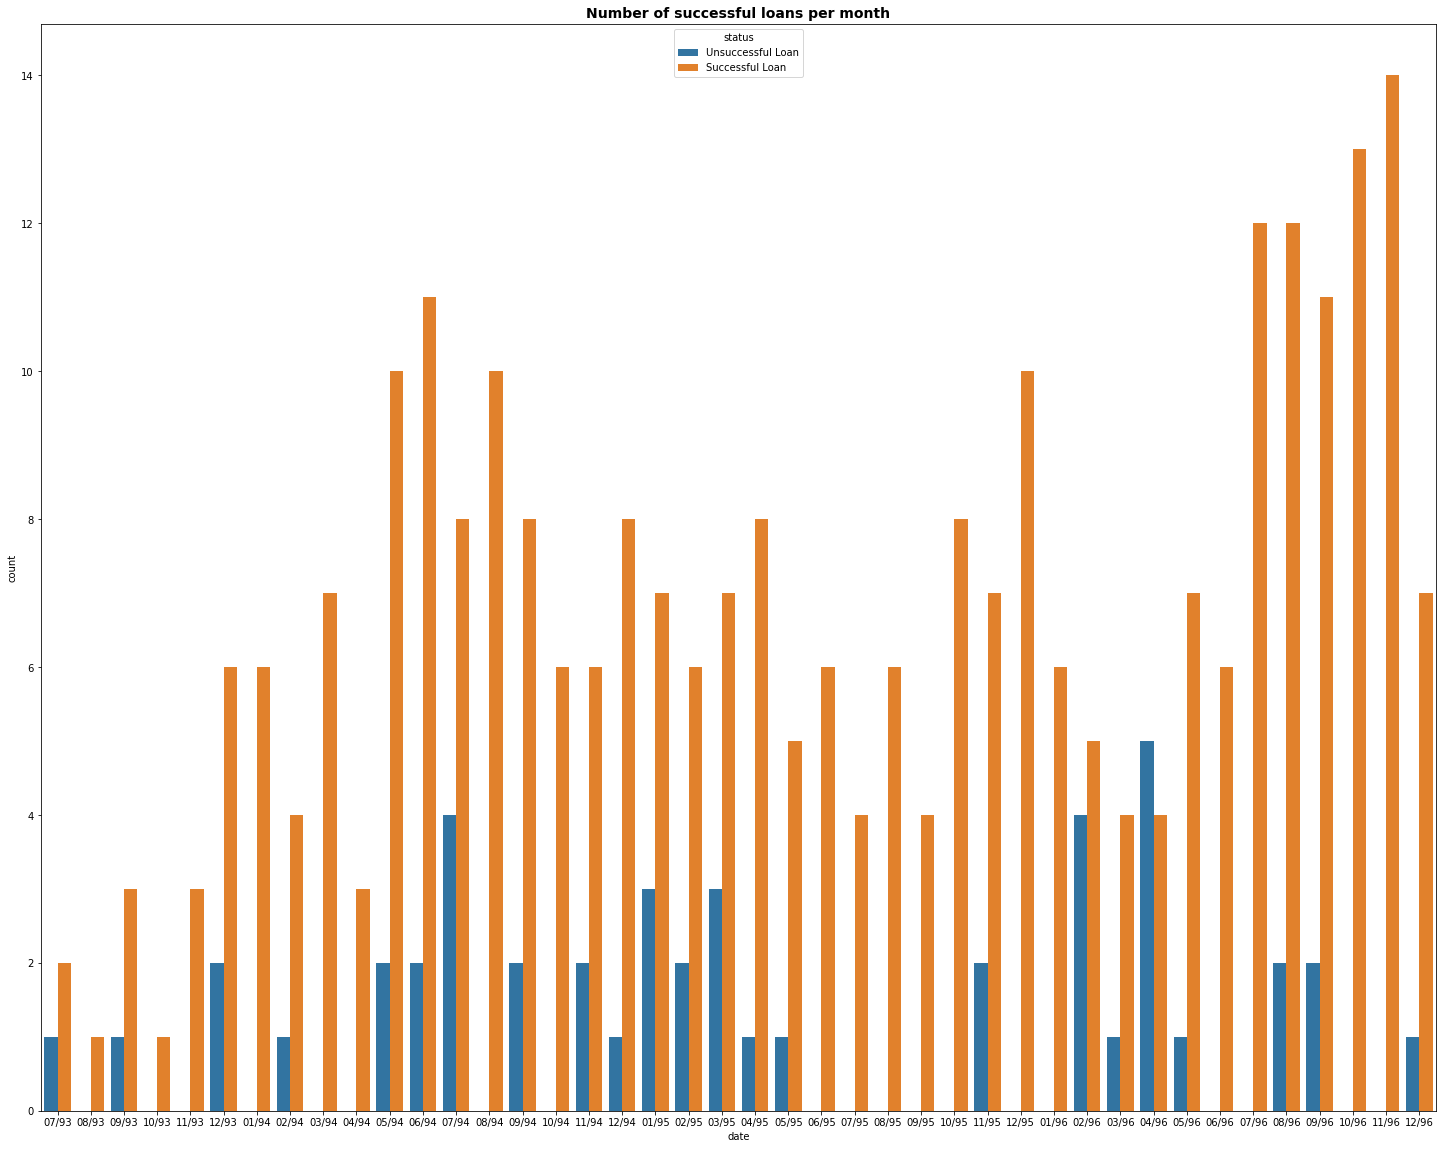

In [72]:
if show_graphs:
    train_data_copy = train_data.copy()
    train_data_copy = train_data_copy.sort_values('date')
    train_data_copy = train_data_copy.astype({'date': str})

    train_data_copy['date'] = train_data_copy['date'].apply(lambda x: get_month(x[0:4]))

    train_data_copy = train_data_copy.astype({'status': str})
    train_data_copy['status'] = train_data_copy['status'].replace(['1.0','-1.0'],['Successful Loan','Unsuccessful Loan'])

    fig = plt.figure()
    plt.figure(figsize=(25,20))
    plt.title("Number of successful loans per month", fontdict={'fontsize': 14, 'fontweight': 'bold'})
    ax = sb.countplot(x ='date', hue = "status", data = train_data_copy)

    plt.show()

C:\Users\pedro\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


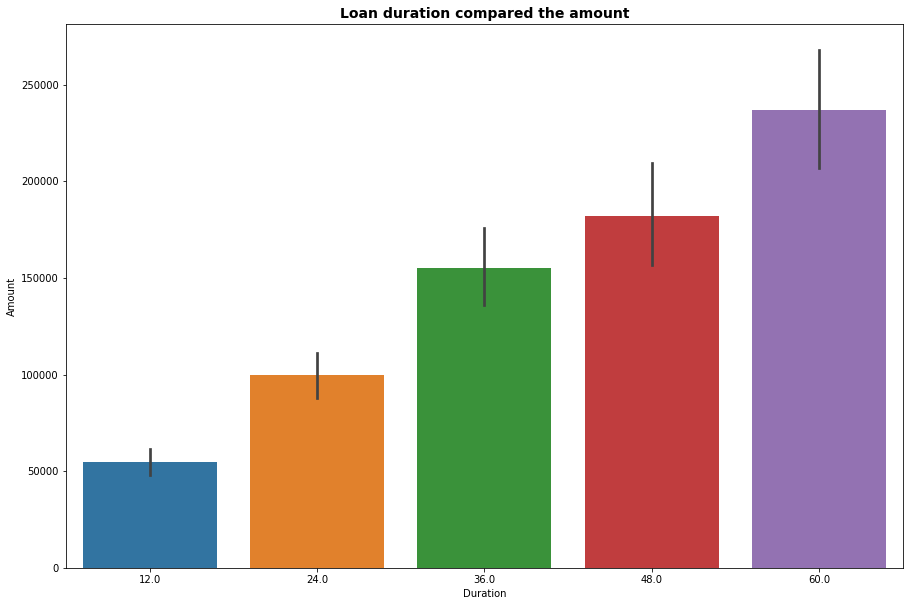

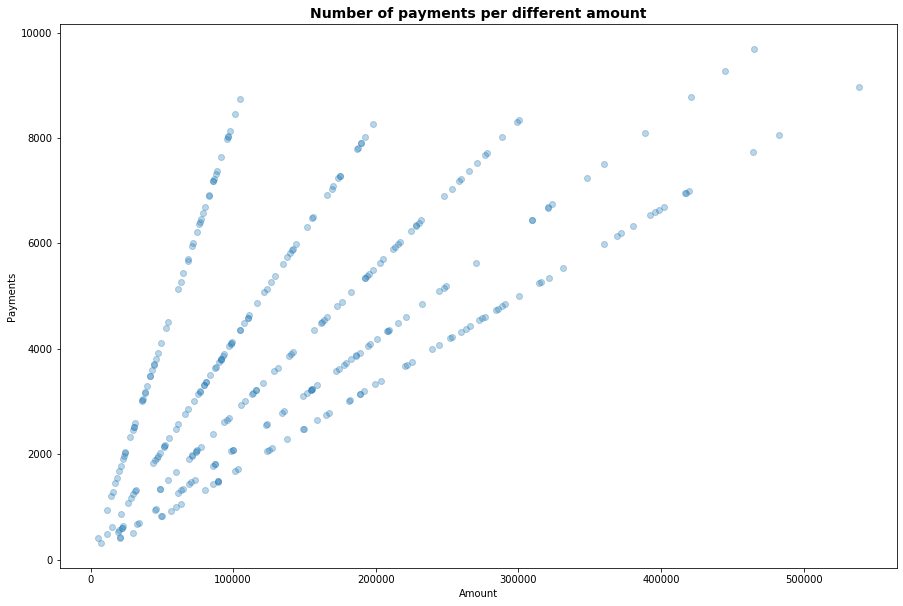

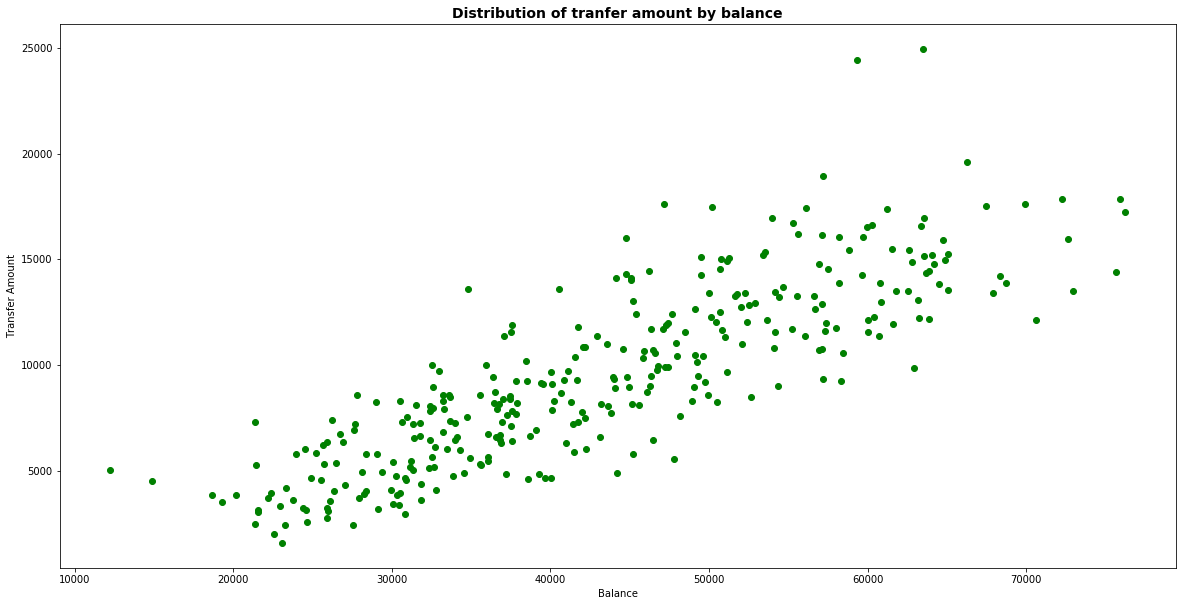

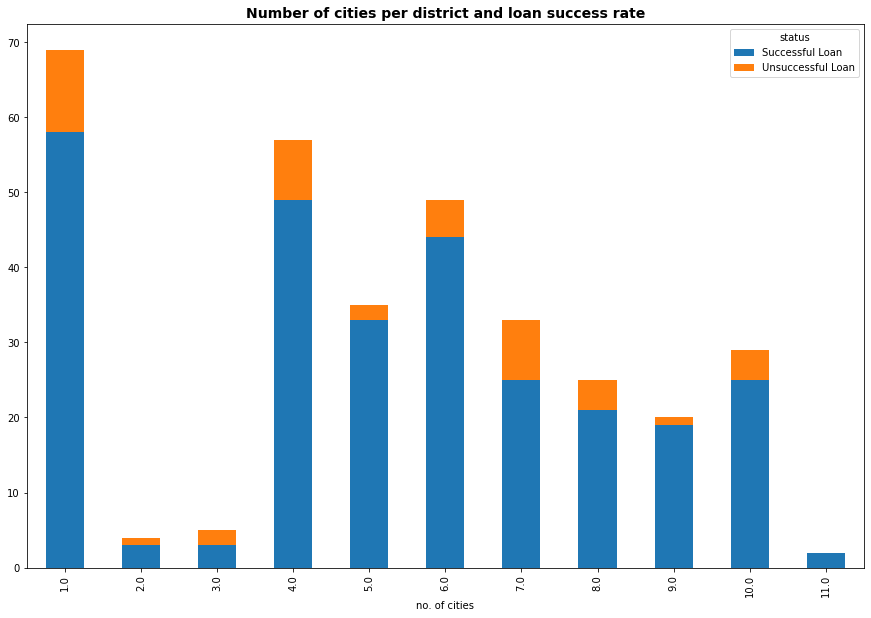

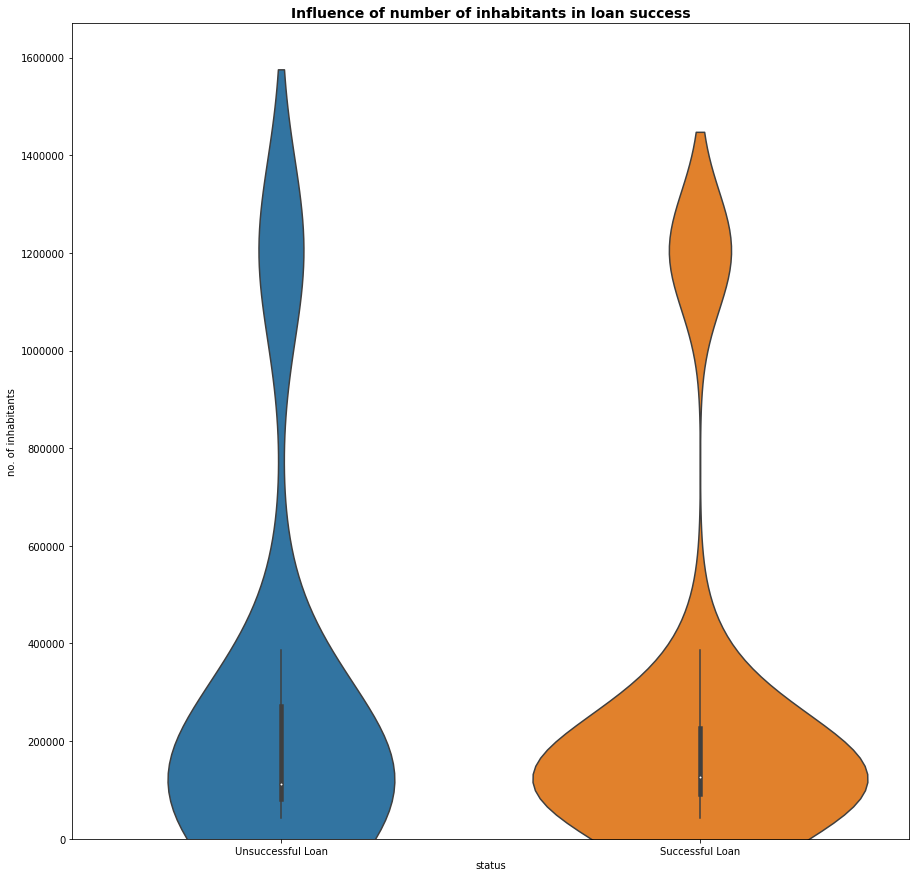

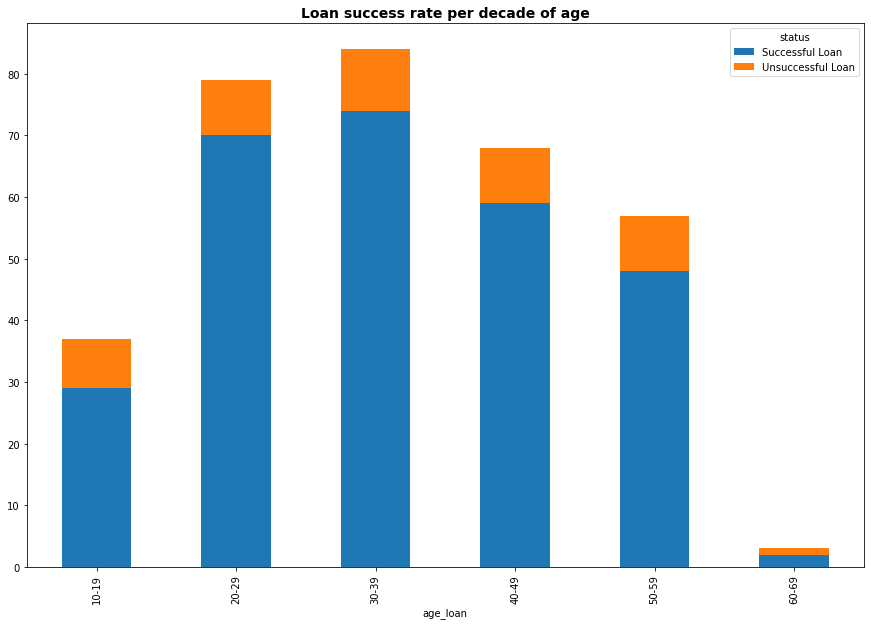

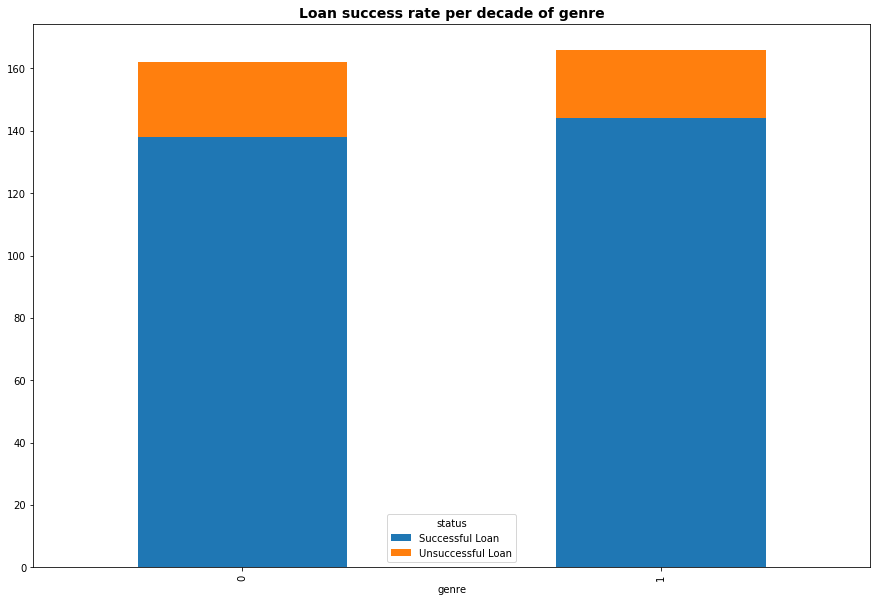

C:\Users\pedro\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


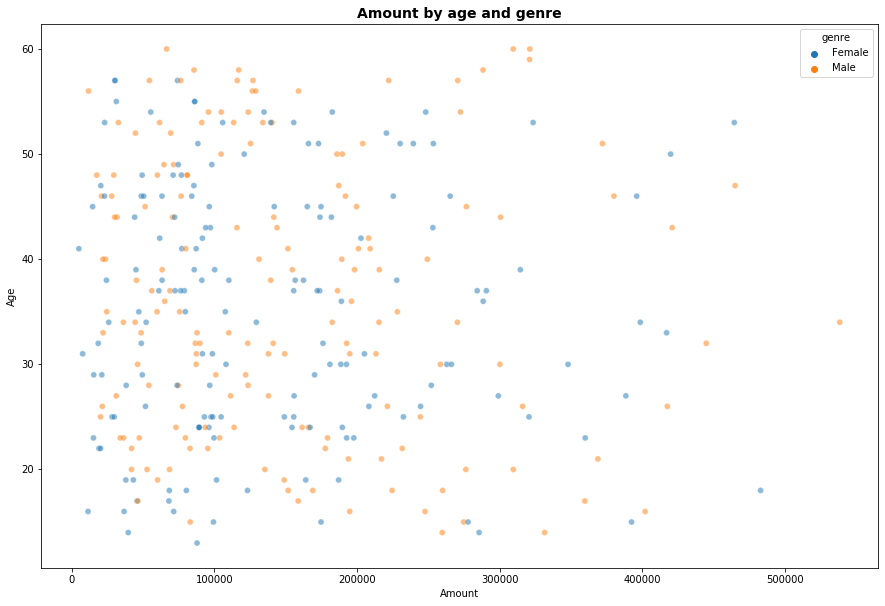

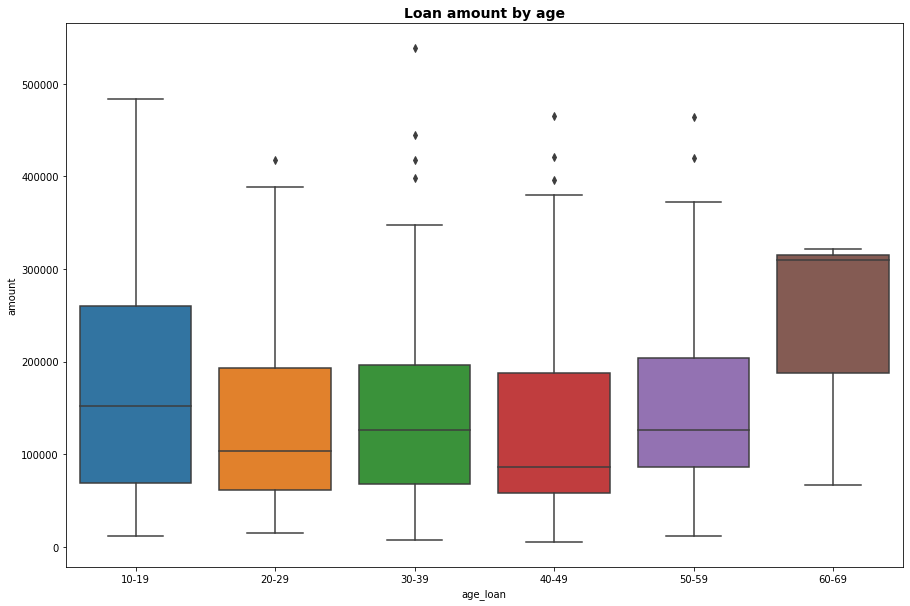

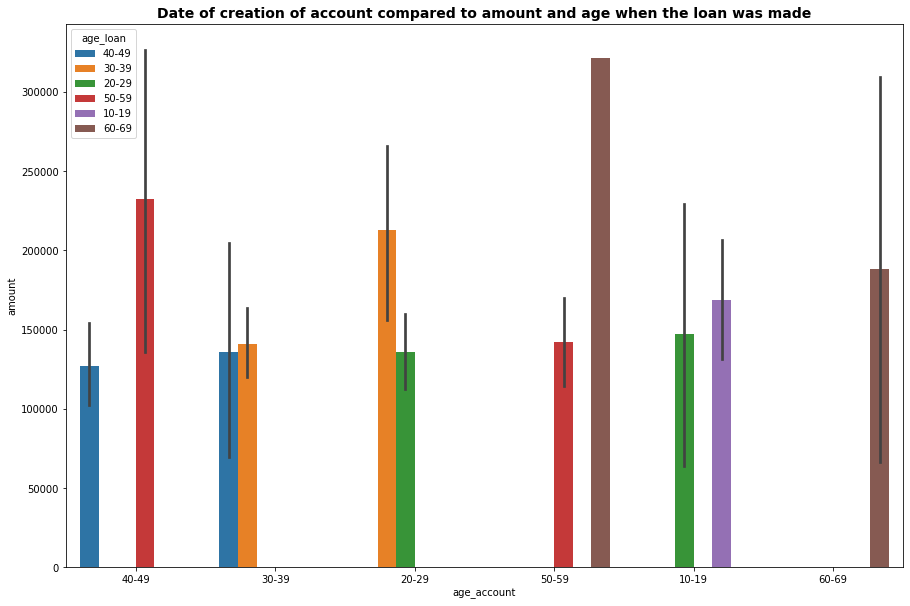

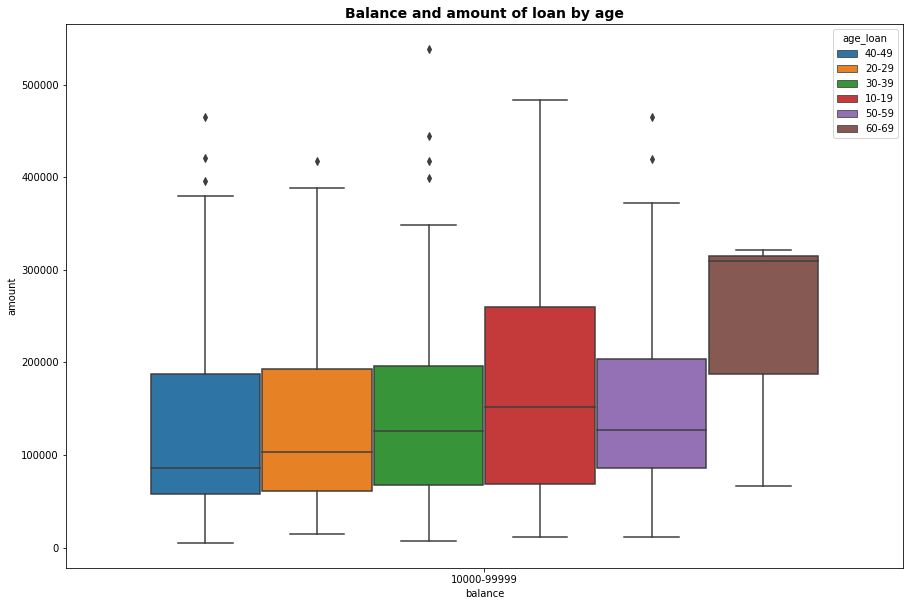

C:\Users\pedro\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


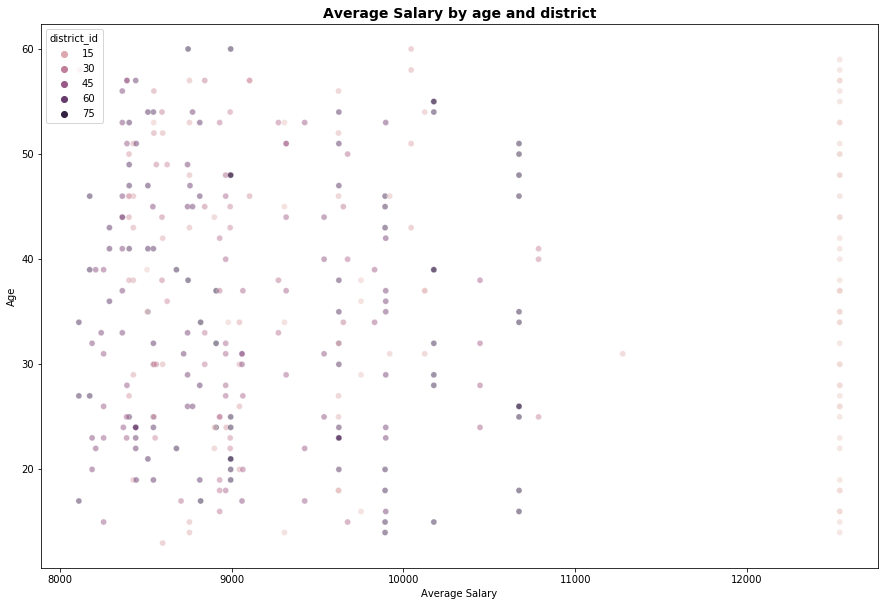

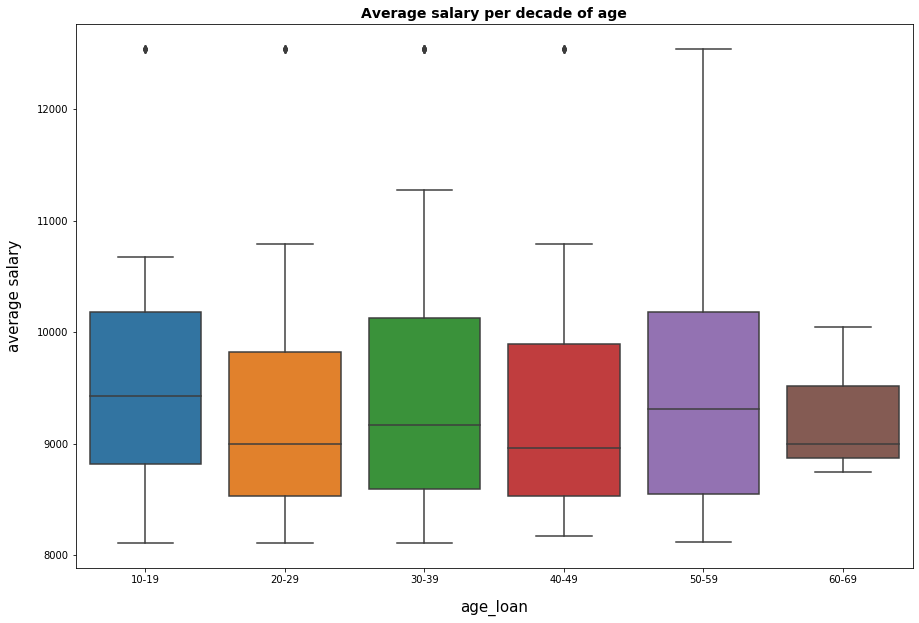

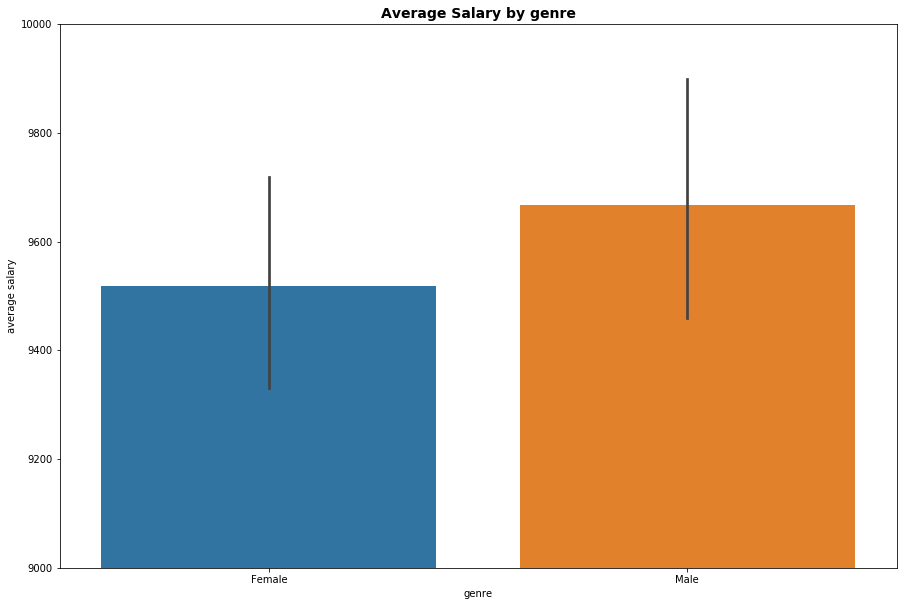

In [73]:
plot_loan_duration(train_data)
plot_number_payments(train_data)
plot_distribution_amount(train_data)
plot_cities_success(train_data)
plot_inhabitants_success(train_data)
plot_success_decade(train_data)
plot_success_decade_genre(train_data)
plot_amount_age_genre(train_data)
plot_amount_age(train_data)
plot_date_amount_age(train_data)                          
plot_balance_amount_age(train_data)
plot_salary_age_district(train_data)                          
plot_average_decade(train_data)
plot_average_genre(train_data)

Now that we have taken all informations that we need from all dates, we can remove these columns from our dataset.

In [74]:
if not run_aggr:
    train_data.drop(['date', 'date_account', 'birth_number', 'age_loan', 'age_account'], axis=1, inplace=True)
    test_data.drop(['date', 'date_account', 'birth_number', 'age_loan', 'age_account'], axis=1, inplace=True)

In [75]:
if not run_aggr:
    test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 0 to 353
Data columns (total 77 columns):
loan_id                                             354 non-null int64
account_id                                          354 non-null int64
amount                                              354 non-null int64
duration                                            354 non-null int64
payments                                            354 non-null int64
status                                              0 non-null float64
operation_count                                     354 non-null int64
operation_count_credit_cash                         354 non-null int64
operation_count_collect                             354 non-null int64
operation_count_with_cash                           354 non-null int64
operation_count_remi                                354 non-null int64
operation_count_with_card                           354 non-null int64
operation_count_interest                   

*issued* and *type* columns have too many null values, so we can remove them.

In [76]:
if not run_aggr:
    train_data.drop(['issued', 'type'], axis=1, inplace=True)
    test_data.drop(['issued', 'type'], axis=1, inplace=True)

In [77]:
option = 1
train_data, test_data = remove_columns(train_data, test_data, option)

In [78]:
train_data = pd.get_dummies(train_data, columns=['frequency'], dtype=bool)
test_data = pd.get_dummies(test_data, columns=['frequency'], dtype=bool)

train_data = pd.get_dummies(train_data, columns=['age_loan_range'], dtype = bool)
test_data = pd.get_dummies(test_data, columns=['age_loan_range'], dtype = bool)

if option != 1:
    train_data = pd.get_dummies(train_data, columns=['age_account_range'], dtype = bool)
    test_data = pd.get_dummies(test_data, columns=['age_account_range'], dtype = bool)

[back](#index)
#### Matrix <a id="matrix"></a>

In [79]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328 entries, 0 to 327
Data columns (total 47 columns):
loan_id                                             328 non-null float64
account_id                                          328 non-null float64
amount                                              328 non-null float64
duration                                            328 non-null float64
payments                                            328 non-null float64
status                                              328 non-null float64
operation_count                                     328 non-null float64
amount_mean                                         328 non-null float64
amount_min                                          328 non-null float64
amount_max                                          328 non-null float64
amount_abs_min                                      328 non-null float64
balance_mean                                        328 non-null float64
balance_min        

In [80]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 0 to 353
Data columns (total 47 columns):
loan_id                                             354 non-null int64
account_id                                          354 non-null int64
amount                                              354 non-null int64
duration                                            354 non-null int64
payments                                            354 non-null int64
status                                              0 non-null float64
operation_count                                     354 non-null int64
amount_mean                                         354 non-null float64
amount_min                                          354 non-null float64
amount_max                                          354 non-null float64
amount_abs_min                                      354 non-null float64
balance_mean                                        354 non-null float64
balance_min                      

6 Dropped columns: ['amount_abs_min', 'type_count_withdrawal', 'type_mean_credit', "unemploymant rate '96", "no. of commited crimes '95", "no. of commited crimes '96"]


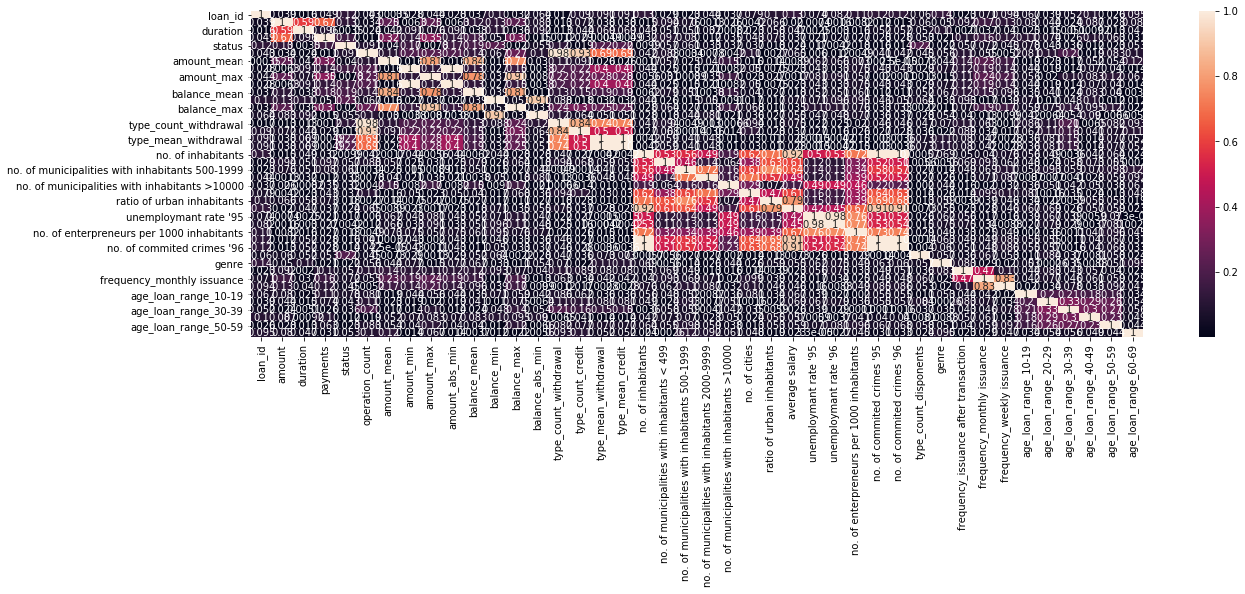

In [81]:
# Dropping ids

if not run_aggr:
    train_data_no_ids = train_data.drop(['account_id', 'district_id', 'disp_id', 'client_id', 'card_id'], axis=1)
    test_data_no_ids = test_data.drop(['account_id', 'district_id', 'disp_id', 'client_id', 'card_id'], axis=1)
else:
    train_data_no_ids = train_data.drop(['account_id', 'district_id'], axis=1)
    test_data_no_ids = test_data.drop(['account_id', 'district_id'], axis=1)


# Create correlation matrix
corr_matrix = train_data_no_ids.corr().abs()
plt.figure(figsize = (20,6))
sb.heatmap(corr_matrix, annot=True)

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
train_data_no_ids.drop(to_drop, axis=1, inplace=True)
test_data_no_ids.drop(to_drop, axis=1, inplace=True)

print("{} Dropped columns: {}".format(len(to_drop), to_drop) )

In [82]:
all_inputs = train_data_no_ids[train_data_no_ids.columns.drop(['loan_id', 'status'])]
all_labels = train_data_no_ids['status'].values

In [83]:
# get a test dataset with 25% of the credit_data_subset
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [84]:
show_confusion = True
run_param_tunning = True
run_classifiers = False
run = False

#### [back](#index)
## Classifiers <a class="anchor" id="classifiers"></a>

In [85]:
if run_classifiers:
    model = 5

    if model == 0:
        classifier = DecisionTreeClassifier()
    elif model == 1:
        classifier = KNeighborsClassifier()
    elif model == 2:
        classifier = SVC(probability=True)
    elif model == 3:
        scaler = StandardScaler()

        # Fit only to the training data
        scaler.fit(X_train)

        # Now apply the transformations to the data:
        X_train_nn = scaler.transform(X_train)
        X_test_nn = scaler.transform(X_test)

        # Create the classifier
        classifier = MLPClassifier(random_state=1, max_iter=500) 
    elif model == 4:
        classifier = LogisticRegression()
    elif model == 5:
        classifier = GaussianNB()
    elif model == 6:
        classifier = RandomForestClassifier(300)
    elif model == 7:
        classifier = XGBClassifier()
    elif model == 8:
        classifier = MLPClassifier(alpha=1, max_iter=1000)
    elif model == 9:
        classifier = AdaBoostClassifier()
    elif model == 10:
        classifier = VotingClassifier(
        estimators=[('dt', DecisionTreeClassifier()), ('svm', LinearSVC()), ('xgb', XGBClassifier())],
        voting='hard', weights=[1,1,1]
    )
        
    classifier.fit(X_train, y_train)
    classifier_prediction = classifier.predict(X_test)

    classifier_classification_report = classification_report(y_test, classifier_prediction, output_dict=True)

    print(f"Classification report:\n{classification_report(y_test, classifier_prediction)}\n")

    sb.set(font_scale=1.0)
    
    ax = plt.subplot()

    confusion_matrix_dtc = confusion_matrix(y_test, classifier_prediction)

    sb.heatmap(confusion_matrix_dtc, annot=True, ax=ax, fmt="g")

    ax.set_xlabel('Predicted Grades');
    ax.set_ylabel('Observed Grades');
    ax.set_title('Confusion Matrix');
    plt.show()

#### [back](#index)
## Decision Tree <a class="anchor" id="decision-tree"></a>

C:\Users\pedro\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  "X does not have valid feature names, but"


TRAIN
F1 Score: 1.0
ROC: 1.0
Classification Report: 
              precision    recall  f1-score   support

     not pay       1.00      1.00      1.00       211
         pay       1.00      1.00      1.00       211

    accuracy                           1.00       422
   macro avg       1.00      1.00      1.00       422
weighted avg       1.00      1.00      1.00       422




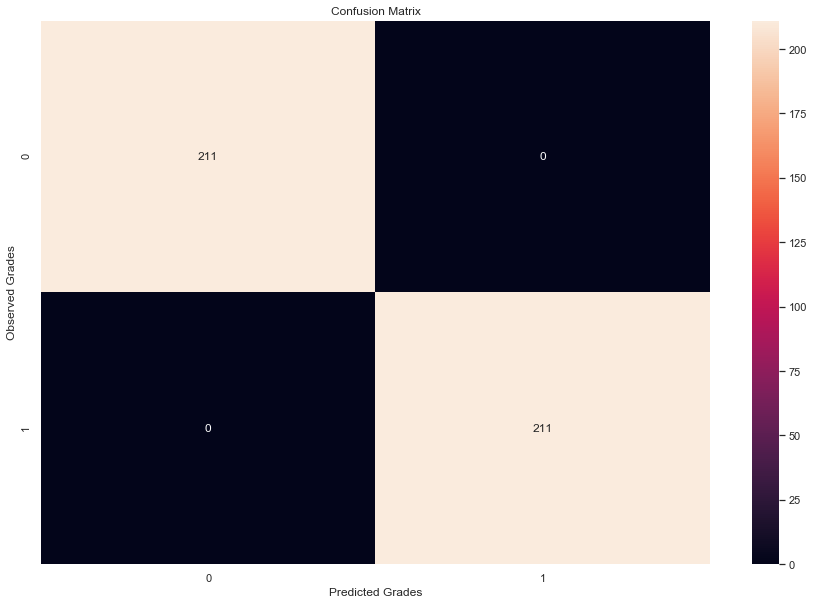

TEST
F1 Score: 0.8592592592592593
ROC: 0.6357234314980794
Classification Report: 
              precision    recall  f1-score   support

     not pay       0.28      0.45      0.34        11
         pay       0.91      0.82      0.86        71

    accuracy                           0.77        82
   macro avg       0.59      0.64      0.60        82
weighted avg       0.82      0.77      0.79        82



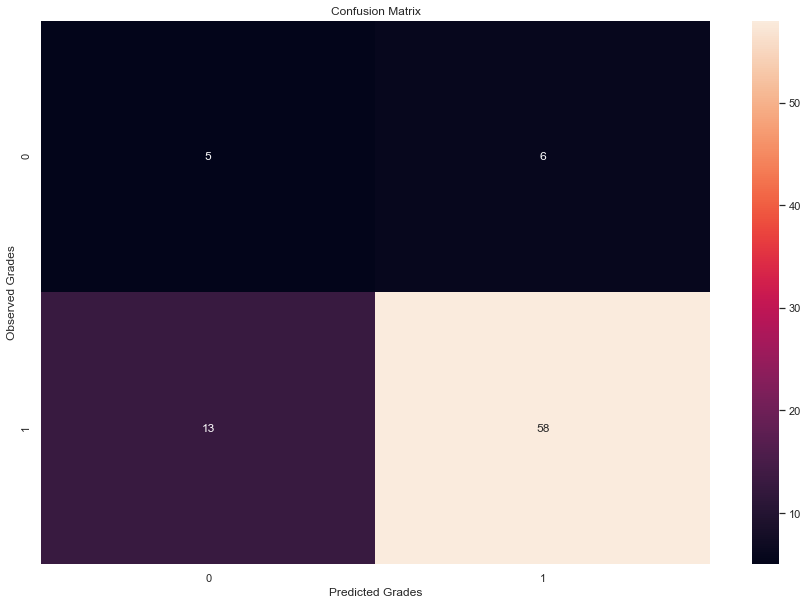

In [86]:
# Create the classifier
decision_tree_classifier = DecisionTreeClassifier()

# Feature Selection
decision_tree_classifier = RFECV(decision_tree_classifier, scoring='roc_auc')

# Train the classifier on the training set
decision_tree_classifier.fit(X_train, y_train)

print(53 * '=')
print("TRAIN")
predictions_train = decision_tree_classifier.predict(X_train)
print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
print()
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_dt = confusion_matrix(y_train, predictions_train)
sb.heatmap(confusion_matrix_dt, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

print(53 * '=')
print("TEST")
predictions_test = decision_tree_classifier.predict(X_test) 
dtc_classification_report = classification_report(y_test, predictions_test, output_dict=True)
f1_dt = f1_score(y_test, predictions_test)
roc_dt = roc_auc_score(y_test, predictions_test)
print("F1 Score: {}".format(f1_dt))
print(f"ROC: {roc_dt}")
print("Classification Report: ")
print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_dt = confusion_matrix(y_test, predictions_test)
sb.heatmap(confusion_matrix_dt, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

### Parameter Tunning <a class="anchor" id="parameter-tunning"></a>

In [ ]:
if run_param_tunning:
    parameter_grid = {'criterion': ['gini', 'entropy'],
                    'splitter': ['best', 'random'],
                    'max_depth': range(1, 10),
                    'max_features': range(10,20)}

    # grid_search = GridSearchCV(DecisionTreeClassifier(),
    #                            param_grid=parameter_grid,
    #                            cv=10,
    #                            verbose=4,
    #                            n_jobs=-1)

    dt_classifier = DecisionTreeClassifier(min_samples_leaf = 10)

    dt_grid_search = GridSearchCV(dt_classifier, scoring="precision_weighted", cv=10, param_grid=parameter_grid)
    dt_grid_search.fit(X_train, y_train)
    print('Best score: {}'.format(dt_grid_search.best_score_))


    print(53 * '=')
    print("TRAIN")
    predictions_train = dt_grid_search.predict(X_train)
    print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
    print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
    print("Classification Report: ")
    print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
    sb.set(font_scale=1.0)
    ax = plt.subplot()
    confusion_matrix_dt = confusion_matrix(y_train, predictions_train)
    sb.heatmap(confusion_matrix_dt, annot=True, ax=ax, fmt="g")
    ax.set_xlabel('Predicted Grades');
    ax.set_ylabel('Observed Grades');
    ax.set_title('Confusion Matrix');
    plt.show()

    print(53 * '=')
    print("TEST")
    predictions_test = dt_grid_search.predict(X_test) 
    dtc_tun_classification_report = classification_report(y_test, predictions_test, target_names=['not pay', 'pay'])
    f1_dt_tun = f1_score(y_test, predictions_test)
    roc_f1_dt = roc_auc_score(y_test, predictions_test)
    print("F1 Score: {}".format(f1_dt_tun))
    print(f"ROC: {roc_f1_dt}")
    print("Classification Report: ")
    print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
    sb.set(font_scale=1.0)
    ax = plt.subplot()
    confusion_matrix_dt = confusion_matrix(y_test, predictions_test)
    sb.heatmap(confusion_matrix_dt, annot=True, ax=ax, fmt="g")
    ax.set_xlabel('Predicted Grades');
    ax.set_ylabel('Observed Grades');
    ax.set_title('Confusion Matrix');
    plt.show()

#### [back](#index)
## K-Nearest Neighbor <a class="anchor" id="k-nearest-neighbor"></a>

In [ ]:
knn = KNeighborsClassifier()

# Feature Selection
# knn = RFECV(knn, scoring='roc_auc')

knn.fit(X_train, y_train)

print(53 * '=')
print("TRAIN")
predictions_train = knn.predict(X_train)
print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
print()
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_knn = confusion_matrix(y_train, predictions_train)
sb.heatmap(confusion_matrix_knn, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

print(53 * '=')
print("TEST")
predictions_test = knn.predict(X_test) 
knn_classification_report = classification_report(y_test, predictions_test, output_dict=True)
f1_knn = f1_score(y_test, predictions_test)
roc_knn = roc_auc_score(y_test, predictions_test)
print("F1 Score: {}".format(f1_knn))
print(f"ROC: {roc_knn}")
print("Classification Report: ")
print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_knn = confusion_matrix(y_test, predictions_test)
sb.heatmap(confusion_matrix_knn, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

### Parameter Tunning <a class="anchor" id="parameter-tunning-2"></a>

In [ ]:
if run_param_tunning:
    # parameter_grid = {'n_neighbors': [5,10,15,20],
    #                   'weights': ['uniform', 'distance'],
    #                   'algorithm': ['ball_tree', 'kd_tree', 'brute']}

    # grid_search = GridSearchCV(KNeighborsClassifier(),
    #                            param_grid=parameter_grid,
    #                            scoring='precision_weighted',
    #                            cv=10,
    #                            n_jobs=3,
    #                            verbose=4)

    knn_classifier = KNeighborsClassifier()

    parameter_grid = {'n_neighbors': [3,5,11,19],
                    'weights': ['uniform','distance'],
                    'p':[1,2],
                    'algorithm':['ball_tree', 'kd_tree', 'brute']}

    knn_grid_search = GridSearchCV(knn_classifier, parameter_grid, scoring="roc_auc", n_jobs=-1, cv=10)
    knn_grid_search.fit(X_train, y_train)
    print('Best score: {}'.format(knn_grid_search.best_score_))


    print(53 * '=')
    print("TRAIN")
    predictions_train = knn_grid_search.predict(X_train)
    print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
    print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
    print("Classification Report: ")
    print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
    sb.set(font_scale=1.0)
    ax = plt.subplot()
    confusion_matrix_knn = confusion_matrix(y_train, predictions_train)
    sb.heatmap(confusion_matrix_knn, annot=True, ax=ax, fmt="g")
    ax.set_xlabel('Predicted Grades');
    ax.set_ylabel('Observed Grades');
    ax.set_title('Confusion Matrix');
    plt.show()

    print(53 * '=')
    print("TEST")
    predictions_test = knn_grid_search.predict(X_test) 
    knn_tun_classification_report = classification_report(y_test, predictions_test, target_names=['not pay', 'pay'])
    f1_knn_tun = f1_score(y_test, predictions_test)
    roc_knn_tun = roc_auc_score(y_test, predictions_test)
    print("F1 Score: {}".format(f1_knn_tun))
    print(f"ROC: {roc_knn_tun}")
    print("Classification Report: ")
    print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
    sb.set(font_scale=1.0)
    ax = plt.subplot()
    confusion_matrix_knn = confusion_matrix(y_test, predictions_test)
    sb.heatmap(confusion_matrix_knn, annot=True, ax=ax, fmt="g")
    ax.set_xlabel('Predicted Grades');
    ax.set_ylabel('Observed Grades');
    ax.set_title('Confusion Matrix');
    plt.show()

#### [back](#index)
## Support-Vector Machines <a class="anchor" id="support-vector-machines"></a>

In [ ]:
svc = SVC(probability=True)

# Feature Selection
# svc = RFECV(svc, scoring='roc_auc')

svc.fit(X_train, y_train)

print(53 * '=')
print("TRAIN")
predictions_train = svc.predict(X_train)
print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
print()
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_svc = confusion_matrix(y_train, predictions_train)
sb.heatmap(confusion_matrix_svc, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

print(53 * '=')
print("TEST")
predictions_test = svc.predict(X_test) 
svm_classification_report = classification_report(y_test, predictions_test, output_dict=True)
f1_svm = f1_score(y_test, predictions_test)
roc_svm = roc_auc_score(y_test, predictions_test)
print("F1 Score: {}".format(f1_svm))
print(f"ROC: {roc_svm}")
print("Classification Report: ")
print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_svc = confusion_matrix(y_test, predictions_test)
sb.heatmap(confusion_matrix_svc, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

### Parameter Tunning <a class="anchor" id="parameter-tunning-3"></a>

In [ ]:
if run_param_tunning:
    svm_classifier = SVC(probability=True)

    parameter_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

    svm_grid_search = GridSearchCV(svm_classifier, scoring="roc_auc", cv=5, param_grid=parameter_grid, verbose=2, refit=True)
    svm_grid_search.fit(X_train, y_train)
    print('Best score: {}'.format(svm_grid_search.best_score_))


    print(53 * '=')
    print("TRAIN")
    predictions_train = svm_grid_search.predict(X_train)
    print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
    print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
    print("Classification Report: ")
    print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
    sb.set(font_scale=1.0)
    ax = plt.subplot()
    confusion_matrix_svm = confusion_matrix(y_train, predictions_train)
    sb.heatmap(confusion_matrix_svm, annot=True, ax=ax, fmt="g")
    ax.set_xlabel('Predicted Grades');
    ax.set_ylabel('Observed Grades');
    ax.set_title('Confusion Matrix');
    plt.show()

    print(53 * '=')
    print("TEST")
    predictions_test = svm_grid_search.predict(X_test) 
    svm_tun_classification_report = classification_report(y_test, predictions_test, target_names=['not pay', 'pay'])
    f1_svm_tun = f1_score(y_test, predictions_test)
    roc_svm_tun = roc_auc_score(y_test, predictions_test)
    print("F1 Score: {}".format(f1_svm_tun))
    print(f"ROC: {roc_svm_tun}")
    print("Classification Report: ")
    print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
    sb.set(font_scale=1.0)
    ax = plt.subplot()
    confusion_matrix_svm = confusion_matrix(y_test, predictions_test)
    sb.heatmap(confusion_matrix_svm, annot=True, ax=ax, fmt="g")
    ax.set_xlabel('Predicted Grades');
    ax.set_ylabel('Observed Grades');
    ax.set_title('Confusion Matrix');
    plt.show()

#### [back](#index)
## Neural Networks <a class="anchor" id="neural-networks"></a>

F1 Score: 0.9154929577464789
ROC: 0.6850192061459668
              precision    recall  f1-score   support

        -1.0       0.45      0.45      0.45        11
         1.0       0.92      0.92      0.92        71

    accuracy                           0.85        82
   macro avg       0.69      0.69      0.69        82
weighted avg       0.85      0.85      0.85        82



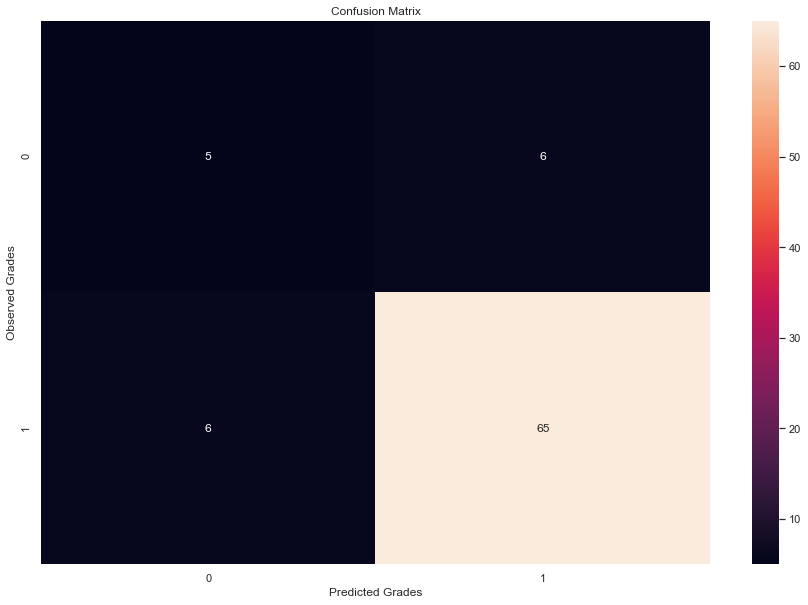

In [91]:
scaler = StandardScaler()

# Feature Selection
#scaler = RFECV(scaler, scoring='roc_auc')

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train_nn = scaler.transform(X_train)
X_test_nn = scaler.transform(X_test)

# Create the classifier
ANNClassifier = MLPClassifier(random_state=1, max_iter=500)

# Train the classifier on the training set
ANNClassifier.fit(X_train_nn, y_train)

predictions_test = ANNClassifier.predict(X_test_nn)

f1_nn = f1_score(y_test, predictions_test)
roc_nn = roc_auc_score(y_test, predictions_test)
print("F1 Score: {}".format(f1_nn))
print(f"ROC: {roc_nn}")

confusion_matrix_ann = confusion_matrix(y_test,predictions_test)

nn_classification_report = classification_report(y_test, predictions_test, output_dict=True)
print(classification_report(y_test,predictions_test))

sb.set(font_scale=1.0)

ax = plt.subplot()

sb.heatmap(confusion_matrix_ann, annot=True, ax=ax, fmt="g")

ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

best_nn_classification_report = nn_classification_report

### Parameter Tunning <a class="anchor" id="parameter-tunning-4"></a>

C:\Users\pedro\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\pedro\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\pedro\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\pedro\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\pedro\Anaconda3\lib\site-packages\sklearn\n

C:\Users\pedro\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\pedro\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\pedro\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the nu

C:\Users\pedro\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\pedro\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\pedro\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the nu

C:\Users\pedro\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\pedro\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\pedro\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\Users\pedro\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\pedro\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\pedro\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the nu

C:\Users\pedro\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\pedro\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\pedro\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the nu

Best score: 0.7815398886827458
Best parameters: {'activation': 'tanh', 'hidden_layer_sizes': 21, 'solver': 'lbfgs'}
Best estimator: MLPClassifier(activation='tanh', hidden_layer_sizes=21, max_iter=500,
              random_state=1, solver='lbfgs')
--- Improved model ---

Classification report:
{'-1.0': {'precision': 0.16, 'recall': 0.36363636363636365, 'f1-score': 0.2222222222222222, 'support': 11}, '1.0': {'precision': 0.8771929824561403, 'recall': 0.704225352112676, 'f1-score': 0.7812499999999999, 'support': 71}, 'accuracy': 0.6585365853658537, 'macro avg': {'precision': 0.5185964912280702, 'recall': 0.5339308578745199, 'f1-score': 0.501736111111111, 'support': 82}, 'weighted avg': {'precision': 0.7809841677364142, 'recall': 0.6585365853658537, 'f1-score': 0.7062584688346882, 'support': 82}}

F1 Score: 0.9154929577464789
ROC: 0.6850192061459668


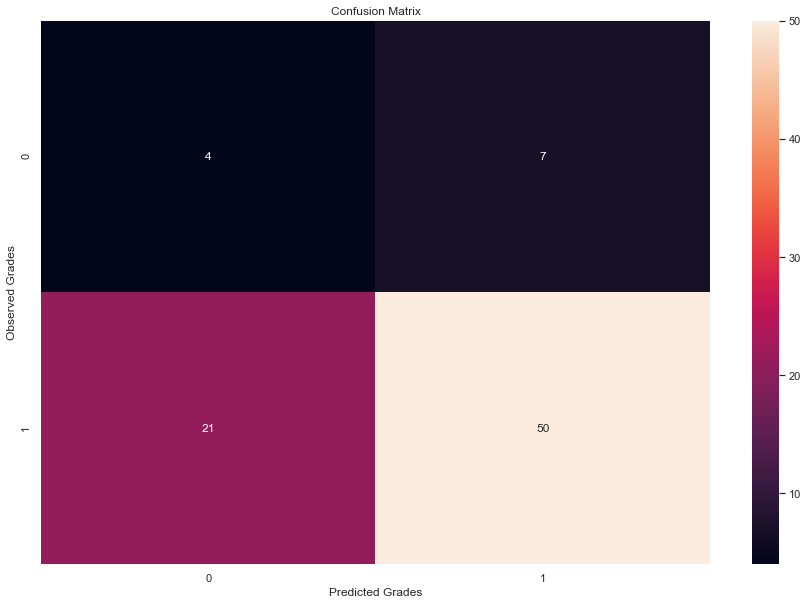

In [94]:
if run_param_tunning:
    parameter_grid = {'activation': ['tanh','identity','logistic','relu'],
                    'solver': ['adam','lbfgs','sgd'],
                    'hidden_layer_sizes': [3,5,8,13,21,34]}

    cross_validation = StratifiedKFold(n_splits=10, shuffle=True,random_state=1)

    grid_search = GridSearchCV(ANNClassifier,
                            param_grid=parameter_grid,
                            cv=cross_validation,
                            scoring="roc_auc")

    grid_search.fit(X_train, y_train)

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
    print('Best estimator: {}'.format(grid_search.best_estimator_))
    ANNClassifier = grid_search.best_estimator_
    yk_pred = ANNClassifier.predict(X_test)

    best_nn_classification_report = classification_report(y_test, yk_pred, output_dict=True)

    print("--- Improved model ---\n")
    print(f"Classification report:\n{best_nn_classification_report}\n")

    sb.set(font_scale=1.0)

    ax = plt.subplot()

    confusion_matrix_ann = confusion_matrix(y_test, yk_pred)
    
    f1_nn_tun = f1_score(y_test, predictions_test)
    roc_nn_tun = roc_auc_score(y_test, predictions_test)
    print("F1 Score: {}".format(f1_nn_tun))
    print(f"ROC: {roc_nn_tun}")

    sb.heatmap(confusion_matrix_ann, annot=True, ax=ax, fmt="g")

    ax.set_xlabel('Predicted Grades');
    ax.set_ylabel('Observed Grades');
    ax.set_title('Confusion Matrix');
    plt.show()

#### [back](#index)
## Logistic Regression <a class="anchor" id="logistic-regression"></a>

TRAIN
F1 Score: 0.9425287356321839
ROC: 0.9407582938388624
Classification Report: 
              precision    recall  f1-score   support

     not pay       0.97      0.91      0.94       211
         pay       0.92      0.97      0.94       211

    accuracy                           0.94       422
   macro avg       0.94      0.94      0.94       422
weighted avg       0.94      0.94      0.94       422




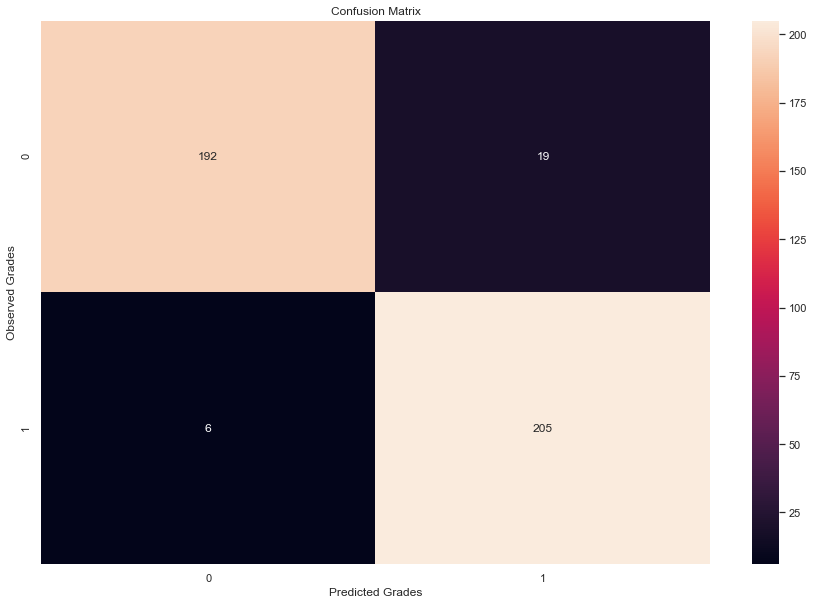

TEST
F1 Score: 0.6095238095238095
ROC: 0.6344430217669654
Classification Report: 
              precision    recall  f1-score   support

     not pay       0.19      0.82      0.31        11
         pay       0.94      0.45      0.61        71

    accuracy                           0.50        82
   macro avg       0.56      0.63      0.46        82
weighted avg       0.84      0.50      0.57        82



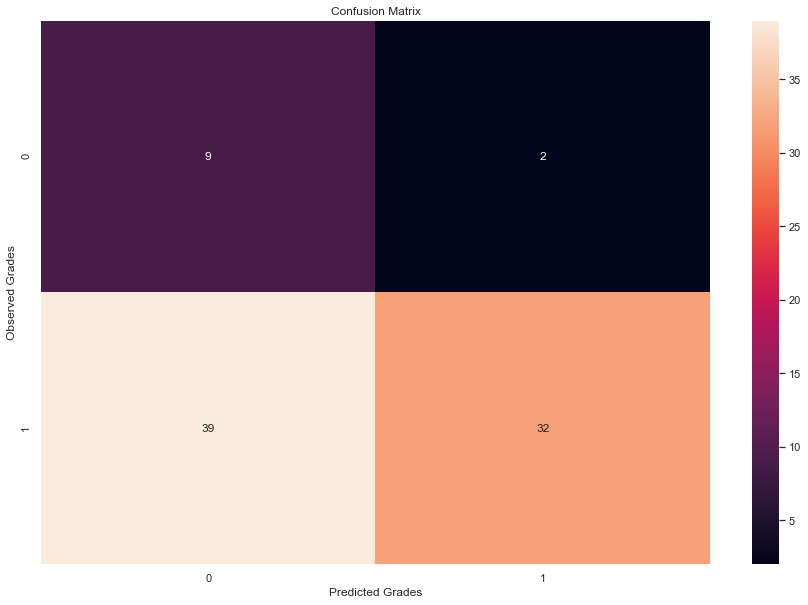

In [95]:
lr = LogisticRegression()

# Feature Selection
lr = RFECV(lr, scoring='f1_macro')

scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)

lr.fit(X_scaled, y_train)

print(53 * '=')
print("TRAIN")
predictions_train = lr.predict(X_scaled)
print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
print()
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_lr = confusion_matrix(y_train, predictions_train)
sb.heatmap(confusion_matrix_lr, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

    
scaler_test = preprocessing.StandardScaler().fit(X_test)
X_scaled_test = scaler_test.transform(X_test)
    
print(53 * '=')
print("TEST")
predictions_test = lr.predict(X_scaled_test) 
lr_classification_report = classification_report(y_test, predictions_test, output_dict=True)
f1_lr = f1_score(y_test, predictions_test)
roc_lr = roc_auc_score(y_test, predictions_test)
print("F1 Score: {}".format(f1_lr))
print(f"ROC: {roc_lr}")
print("Classification Report: ")
print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_lr = confusion_matrix(y_test, predictions_test)
sb.heatmap(confusion_matrix_lr, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

### Parameter Tunning <a class="anchor" id="parameter-tunning-5"></a>

C:\Users\pedro\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\pedro\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Best score: 0.7984285186942994
TRAIN
F1 Score: 0.7488372093023256
ROC: 0.7440758293838863
Classification Report: 
              precision    recall  f1-score   support

     not pay       0.75      0.73      0.74       211
         pay       0.74      0.76      0.75       211

    accuracy                           0.74       422
   macro avg       0.74      0.74      0.74       422
weighted avg       0.74      0.74      0.74       422



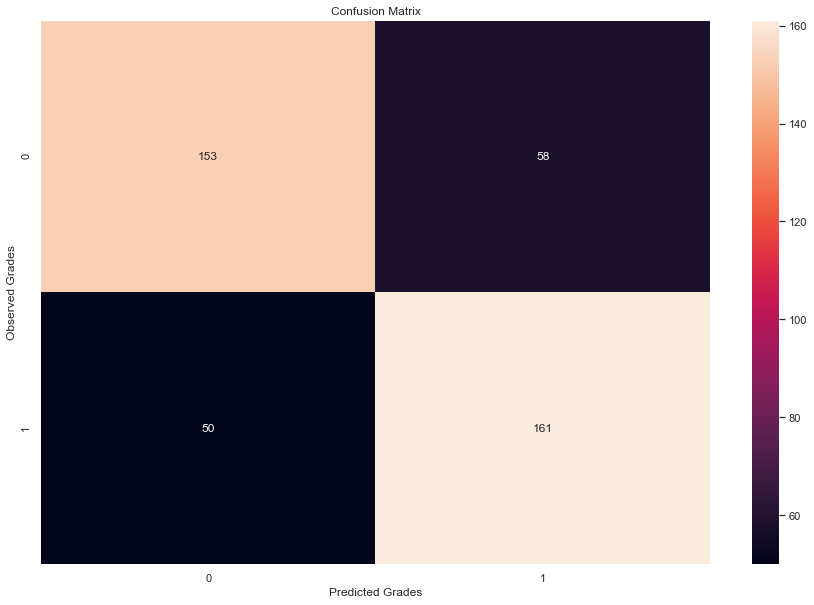

TEST
F1 Score: 0.9104477611940299
ROC: 0.8386683738796413
Classification Report: 
              precision    recall  f1-score   support

     not pay       0.47      0.82      0.60        11
         pay       0.97      0.86      0.91        71

    accuracy                           0.85        82
   macro avg       0.72      0.84      0.76        82
weighted avg       0.90      0.85      0.87        82



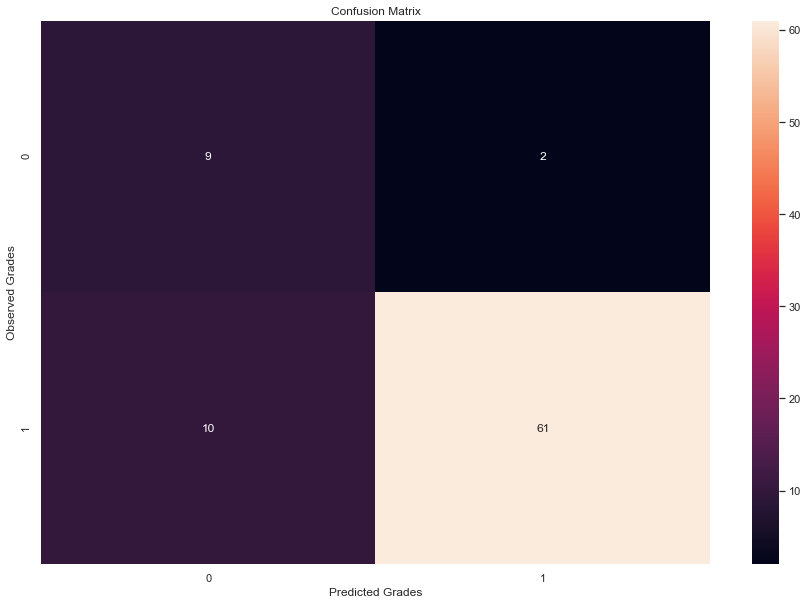

In [96]:
if run_param_tunning:
    lr_classifier = LogisticRegression()
    
    lr_grid_search = GridSearchCV(lr_classifier, scoring="roc_auc", cv=5, param_grid={})
    lr_grid_search.fit(X_train, y_train)
    print('Best score: {}'.format(lr_grid_search.best_score_))


    print(53 * '=')
    print("TRAIN")
    predictions_train = lr_grid_search.predict(X_train)
    print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
    print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
    print("Classification Report: ")
    print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
    sb.set(font_scale=1.0)
    ax = plt.subplot()
    confusion_matrix_lr = confusion_matrix(y_train, predictions_train)
    sb.heatmap(confusion_matrix_lr, annot=True, ax=ax, fmt="g")
    ax.set_xlabel('Predicted Grades');
    ax.set_ylabel('Observed Grades');
    ax.set_title('Confusion Matrix');
    plt.show()
    
    print(53 * '=')
    print("TEST")
    predictions_test = lr_grid_search.predict(X_test) 
    lr_tun_classification_report = classification_report(y_test, predictions_test, output_dict=True)
    f1_lr_tun = f1_score(y_test, predictions_test)
    roc_lr_tun = roc_auc_score(y_test, predictions_test)
    print("F1 Score: {}".format(f1_lr_tun))
    print(f"ROC: {roc_lr_tun}")
    print("Classification Report: ")
    print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
    sb.set(font_scale=1.0)
    ax = plt.subplot()
    confusion_matrix_lr = confusion_matrix(y_test, predictions_test)
    sb.heatmap(confusion_matrix_lr, annot=True, ax=ax, fmt="g")
    ax.set_xlabel('Predicted Grades');
    ax.set_ylabel('Observed Grades');
    ax.set_title('Confusion Matrix');
    plt.show()

#### [back](#index)
## Naive Bayes <a class="anchor" id="naive-bayes"></a>

TRAIN
F1 Score: 0.5497076023391813
ROC: 0.6350710900473934
Classification Report: 
              precision    recall  f1-score   support

     not pay       0.60      0.82      0.69       211
         pay       0.72      0.45      0.55       211

    accuracy                           0.64       422
   macro avg       0.66      0.64      0.62       422
weighted avg       0.66      0.64      0.62       422




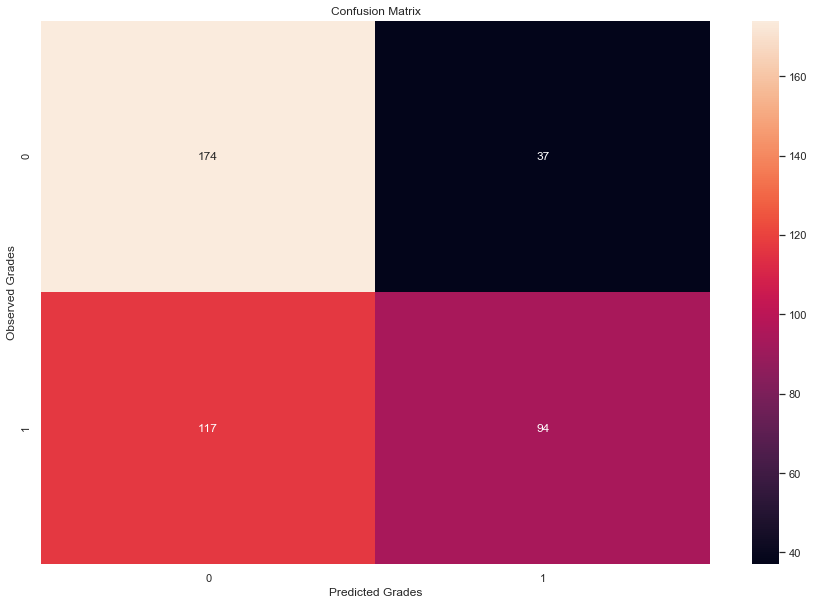

TEST
F1 Score: 0.6055045871559632
ROC: 0.5051216389244558
Classification Report: 
              precision    recall  f1-score   support

     not pay       0.14      0.55      0.22        11
         pay       0.87      0.46      0.61        71

    accuracy                           0.48        82
   macro avg       0.50      0.51      0.41        82
weighted avg       0.77      0.48      0.55        82



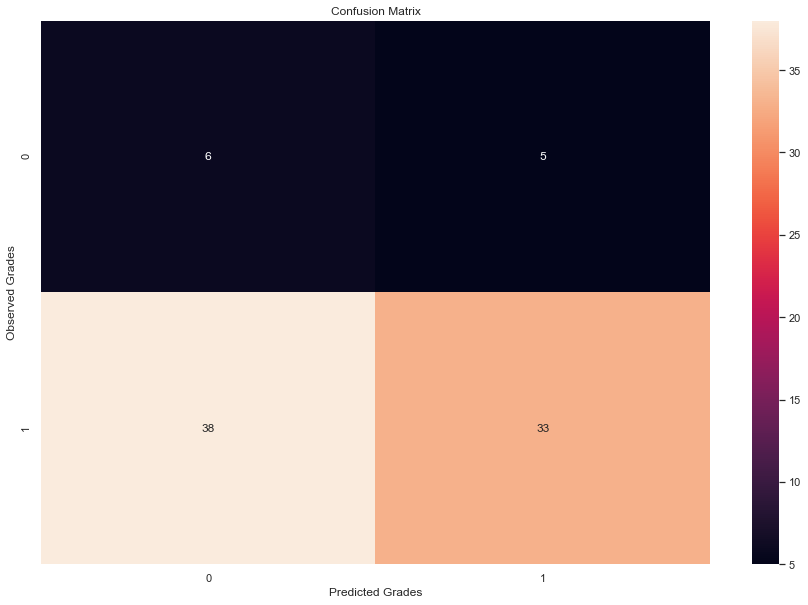

In [97]:
nb = GaussianNB()

# Feature Selection
# nb = RFECV(nb, scoring='roc_auc')

nb.fit(X_train, y_train)

print(53 * '=')
print("TRAIN")
predictions_train = nb.predict(X_train)
print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
print()
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_nb = confusion_matrix(y_train, predictions_train)
sb.heatmap(confusion_matrix_nb, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

print(53 * '=')
print("TEST")
predictions_test = nb.predict(X_test) 
nb_classification_report = classification_report(y_test, predictions_test, output_dict=True)
f1_nb = f1_score(y_test, predictions_test)
roc_nb = roc_auc_score(y_test, predictions_test)
print("F1 Score: {}".format(f1_nb))
print(f"ROC: {roc_nb}")
print("Classification Report: ")
print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_nb = confusion_matrix(y_test, predictions_test)
sb.heatmap(confusion_matrix_nb, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

### Parameter Tunning <a class="anchor" id="parameter-tunning-6"></a>

Best score: 0.719203185150029
TRAIN
F1 Score: 0.5497076023391813
ROC: 0.6350710900473934
Classification Report: 
              precision    recall  f1-score   support

     not pay       0.60      0.82      0.69       211
         pay       0.72      0.45      0.55       211

    accuracy                           0.64       422
   macro avg       0.66      0.64      0.62       422
weighted avg       0.66      0.64      0.62       422



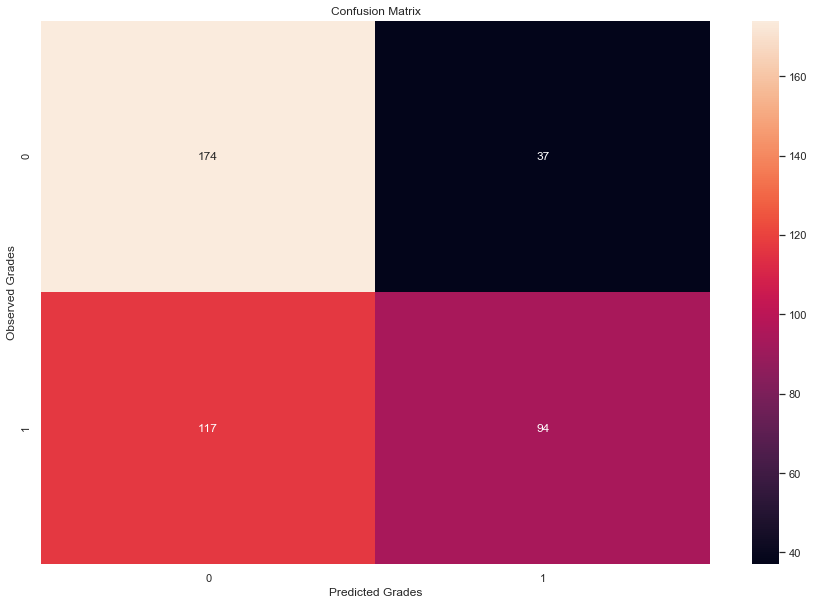

TEST
F1 Score: 0.6055045871559632
ROC: 0.5051216389244558
Classification Report: 
              precision    recall  f1-score   support

     not pay       0.14      0.55      0.22        11
         pay       0.87      0.46      0.61        71

    accuracy                           0.48        82
   macro avg       0.50      0.51      0.41        82
weighted avg       0.77      0.48      0.55        82



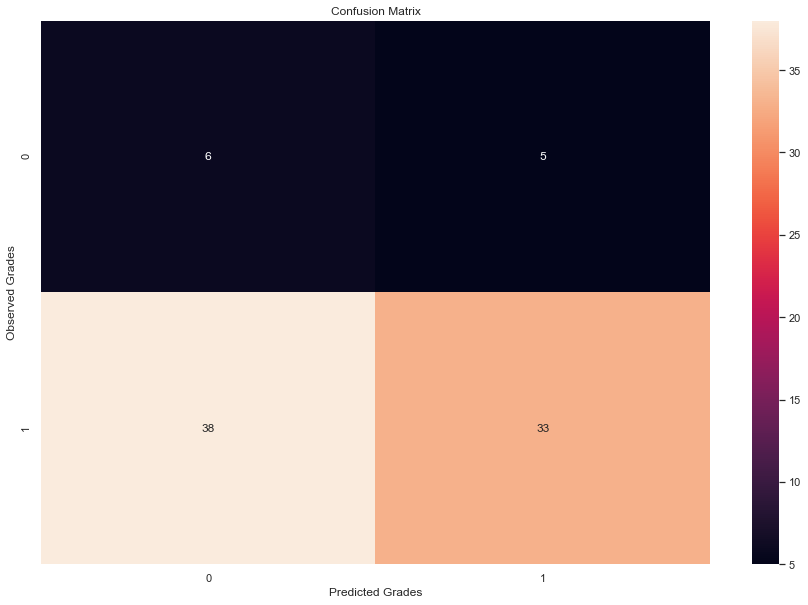

In [98]:
if run_param_tunning:
    nb_classifier = GaussianNB()

    nb_grid_search = GridSearchCV(nb_classifier, scoring="roc_auc", cv=5, param_grid={})
    nb_grid_search.fit(X_train, y_train)
    print('Best score: {}'.format(nb_grid_search.best_score_))


    print(53 * '=')
    print("TRAIN")
    predictions_train = nb_grid_search.predict(X_train)
    print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
    print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
    print("Classification Report: ")
    print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
    sb.set(font_scale=1.0)
    ax = plt.subplot()
    confusion_matrix_nb = confusion_matrix(y_train, predictions_train)
    sb.heatmap(confusion_matrix_nb, annot=True, ax=ax, fmt="g")
    ax.set_xlabel('Predicted Grades');
    ax.set_ylabel('Observed Grades');
    ax.set_title('Confusion Matrix');
    plt.show()

    print(53 * '=')
    print("TEST")
    predictions_test = nb_grid_search.predict(X_test) 
    nb_tun_classification_report = classification_report(y_test, predictions_test, output_dict=True)
    f1_nb_tun = f1_score(y_test, predictions_test)
    roc_nb_tun = roc_auc_score(y_test, predictions_test)
    print("F1 Score: {}".format(f1_nb_tun))
    print(f"ROC: {roc_nb_tun}")
    print("Classification Report: ")
    print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
    sb.set(font_scale=1.0)
    ax = plt.subplot()
    confusion_matrix_nb = confusion_matrix(y_test, predictions_test)
    sb.heatmap(confusion_matrix_nb, annot=True, ax=ax, fmt="g")
    ax.set_xlabel('Predicted Grades');
    ax.set_ylabel('Observed Grades');
    ax.set_title('Confusion Matrix');
    plt.show()

#### [back](#index)
## Random Forest <a class="anchor" id="random-forest"></a>

In [ ]:
rf = RandomForestClassifier()

#from sklearn.feature_selection import SelectFromModel
# Feature Selection
rf = RFECV(rf, scoring='f1_macro')
#rf = SelectFromModel(RandomForestClassifier(n_estimators = 100))

rf.fit(X_train, y_train)
print(rf.support_)
print(53 * '=')
print("TRAIN")
predictions_train = rf.predict(X_train)
print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
print()
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_rf = confusion_matrix(y_train, predictions_train)
sb.heatmap(confusion_matrix_rf, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

print(53 * '=')
print("TEST")
predictions_test = rf.predict(X_test)
rf_classification_report = classification_report(y_test, predictions_test, output_dict=True)
f1_rf = f1_score(y_test, predictions_test)
roc_rf = roc_auc_score(y_test, predictions_test)
print("F1 Score: {}".format(f1_rf))
print(f"ROC: {roc_rf}")
print("Classification Report: ")
print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_rf = confusion_matrix(y_test, predictions_test)
sb.heatmap(confusion_matrix_rf, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

### Parameter Tunning <a class="anchor" id="parameter-tunning-7"></a>

Best score: 0.9931840953435638
TRAIN
F1 Score: 1.0
ROC: 1.0
Classification Report: 
              precision    recall  f1-score   support

     not pay       1.00      1.00      1.00       211
         pay       1.00      1.00      1.00       211

    accuracy                           1.00       422
   macro avg       1.00      1.00      1.00       422
weighted avg       1.00      1.00      1.00       422



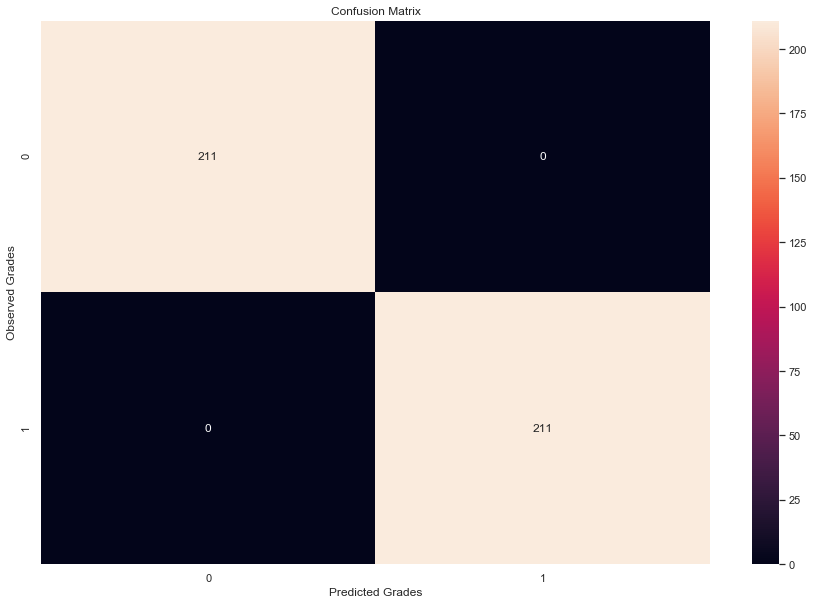

TEST
F1 Score: 0.9305555555555556
ROC: 0.6991037131882203
Classification Report: 
              precision    recall  f1-score   support

     not pay       0.56      0.45      0.50        11
         pay       0.92      0.94      0.93        71

    accuracy                           0.88        82
   macro avg       0.74      0.70      0.72        82
weighted avg       0.87      0.88      0.87        82



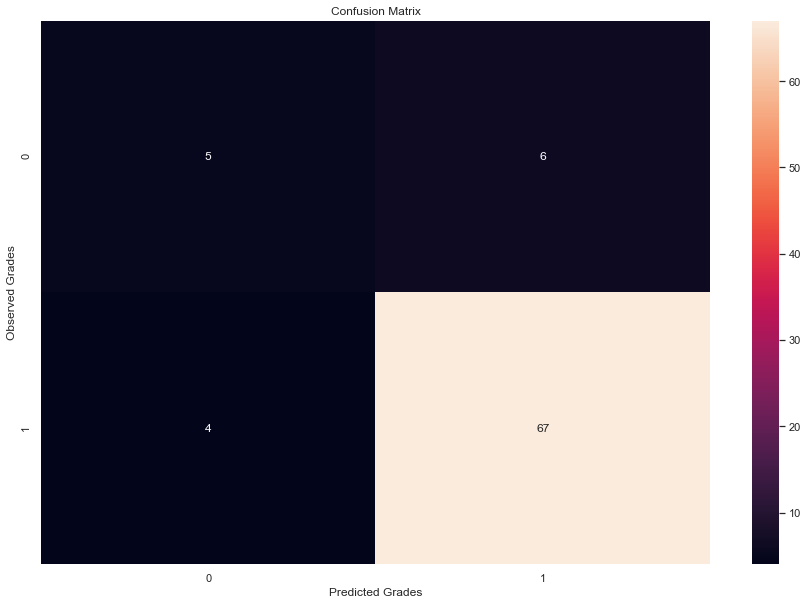

In [100]:
if run_param_tunning:
    rf_classifier = RandomForestClassifier()

    rf_grid_search = GridSearchCV(rf_classifier, scoring="roc_auc", cv=5, param_grid={'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12]})
    rf_grid_search.fit(X_train, y_train)
    print('Best score: {}'.format(rf_grid_search.best_score_))


    print(53 * '=')
    print("TRAIN")
    predictions_train = rf_grid_search.predict(X_train)
    print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
    print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
    print("Classification Report: ")
    print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
    sb.set(font_scale=1.0)
    ax = plt.subplot()
    confusion_matrix_rf = confusion_matrix(y_train, predictions_train)
    sb.heatmap(confusion_matrix_rf, annot=True, ax=ax, fmt="g")
    ax.set_xlabel('Predicted Grades');
    ax.set_ylabel('Observed Grades');
    ax.set_title('Confusion Matrix');
    plt.show()

    print(53 * '=')
    print("TEST")
    predictions_test = rf_grid_search.predict(X_test)
    rf_tun_classification_report = classification_report(y_test, predictions_test, output_dict=True)
    f1_rf_tun = f1_score(y_test, predictions_test)
    roc_rf_tun = roc_auc_score(y_test, predictions_test)
    print("F1 Score: {}".format(f1_rf_tun))
    print(f"ROC: {roc_rf_tun}")
    print("Classification Report: ")
    print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
    sb.set(font_scale=1.0)
    ax = plt.subplot()
    confusion_matrix_rf = confusion_matrix(y_test, predictions_test)
    sb.heatmap(confusion_matrix_rf, annot=True, ax=ax, fmt="g")
    ax.set_xlabel('Predicted Grades');
    ax.set_ylabel('Observed Grades');
    ax.set_title('Confusion Matrix');
    plt.show()

#### [back](#index)
## XGBoost <a class="anchor" id="xgboost"></a>

In [ ]:

xgb = XGBClassifier()

# Feature Selection
xgb = RFECV(xgb, scoring='roc_auc')

xgb.fit(X_train, y_train)

print(53 * '=')
print("TRAIN")
predictions_train = xgb.predict(X_train)
print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
print()
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_xgb = confusion_matrix(y_train, predictions_train)
sb.heatmap(confusion_matrix_xgb, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

print(53 * '=')
print("TEST")
predictions_test = xgb.predict(X_test)
xgb_classification_report = classification_report(y_test, predictions_test, output_dict=True)
f1_xgb = f1_score(y_test, predictions_test)
roc_xgb = roc_auc_score(y_test, predictions_test)
print("F1 Score: {}".format(f1_xgb))
print(f"ROC: {roc_xgb}")
print("Classification Report: ")
print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_xgb = confusion_matrix(y_test, predictions_test)
sb.heatmap(confusion_matrix_xgb, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

### Parameter Tunning <a class="anchor" id="parameter-tunning-8"></a>

In [ ]:
if run_param_tunning:
    xgb_classifier = XGBClassifier()
    
    # Feature Selection
    xgb_classifier = RFECV(xgb, scoring='roc_auc')

    xgb_grid_search = GridSearchCV(xgb_classifier, scoring="roc_auc", cv=5, param_grid={})
    xgb_grid_search.fit(X_train, y_train)
    print('Best score: {}'.format(xgb_grid_search.best_score_))


    print(53 * '=')
    print("TRAIN")
    predictions_train = xgb_grid_search.predict(X_train)
    print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
    print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
    print("Classification Report: ")
    print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
    sb.set(font_scale=1.0)
    ax = plt.subplot()
    confusion_matrix_xgb = confusion_matrix(y_train, predictions_train)
    sb.heatmap(confusion_matrix_xgb, annot=True, ax=ax, fmt="g")
    ax.set_xlabel('Predicted Grades');
    ax.set_ylabel('Observed Grades');
    ax.set_title('Confusion Matrix');
    plt.show()

    print(53 * '=')
    print("TEST")
    predictions_test = xgb_grid_search.predict(X_test)
    xgb_tun_classification_report = classification_report(y_test, predictions_test, output_dict=True)
    f1_xgb_tun = f1_score(y_test, predictions_test)
    roc_xgb_tun = roc_auc_score(y_test, predictions_test)
    print("F1 Score: {}".format(f1_xgb_tun))
    print(f"ROC: {roc_xgb_tun}")
    print("Classification Report: ")
    print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
    sb.set(font_scale=1.0)
    ax = plt.subplot()
    confusion_matrix_xgb = confusion_matrix(y_test, predictions_test)
    sb.heatmap(confusion_matrix_xgb, annot=True, ax=ax, fmt="g")
    ax.set_xlabel('Predicted Grades');
    ax.set_ylabel('Observed Grades');
    ax.set_title('Confusion Matrix');
    plt.show()

#### [back](#index)
## MLP <a class="anchor" id="mlp"></a>

In [ ]:
mlp = MLPClassifier(alpha=1, max_iter=1000)

# Feature Selection
# mlp = RFECV(mlp, scoring='roc_auc')

mlp.fit(X_train, y_train)

print(53 * '=')
print("TRAIN")
predictions_train = mlp.predict(X_train)
print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
print()
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_mlp = confusion_matrix(y_train, predictions_train)
sb.heatmap(confusion_matrix_mlp, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

print(53 * '=')
print("TEST")
predictions_test = mlp.predict(X_test)
mlp_classification_report = classification_report(y_test, predictions_test, output_dict=True)
f1_mlp = f1_score(y_test, predictions_test)
roc_mlp = roc_auc_score(y_test, predictions_test)
print("F1 Score: {}".format(f1_mlp))
print(f"ROC: {roc_mlp}")
print("Classification Report: ")
print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_mlp = confusion_matrix(y_test, predictions_test)
sb.heatmap(confusion_matrix_mlp, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

### Parameter Tunning <a class="anchor" id="parameter-tunning-9"></a>

In [ ]:
if run_param_tunning:
    mlp_classifier = MLPClassifier(random_state=1, early_stopping=False)

    mlp_grid_search = GridSearchCV(mlp_classifier, scoring="roc_auc", cv=10, param_grid={})
    mlp_grid_search.fit(X_train, y_train)
    print('Best score: {}'.format(mlp_grid_search.best_score_))


    print(53 * '=')
    print("TRAIN")
    predictions_train = mlp_grid_search.predict(X_train)
    print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
    print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
    print("Classification Report: ")
    print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
    sb.set(font_scale=1.0)
    ax = plt.subplot()
    confusion_matrix_mlp = confusion_matrix(y_train, predictions_train)
    sb.heatmap(confusion_matrix_mlp, annot=True, ax=ax, fmt="g")
    ax.set_xlabel('Predicted Grades');
    ax.set_ylabel('Observed Grades');
    ax.set_title('Confusion Matrix');
    plt.show()

    print(53 * '=')
    print("TEST")
    predictions_test = mlp_grid_search.predict(X_test) 
    mlp_tun_classification_report = classification_report(y_test, predictions_test, output_dict=True)
    f1_mlp_tun = f1_score(y_test, predictions_test)
    roc_mlp_tun = roc_auc_score(y_test, predictions_test)
    print("F1 Score: {}".format(f1_mlp_tun))
    print(f"ROC: {roc_mlp_tun}")
    print("Classification Report: ")
    print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
    sb.set(font_scale=1.0)
    ax = plt.subplot()
    confusion_matrix_mlp = confusion_matrix(y_test, predictions_test)
    sb.heatmap(confusion_matrix_mlp, annot=True, ax=ax, fmt="g")
    ax.set_xlabel('Predicted Grades');
    ax.set_ylabel('Observed Grades');
    ax.set_title('Confusion Matrix');
    plt.show()

#### [back](#index)
## Ada Boost <a class="anchor" id="ada-boost"></a>

In [ ]:
boost = AdaBoostClassifier()

# Feature Selection
boost = RFECV(boost, scoring='roc_auc')

boost.fit(X_train, y_train)

print(53 * '=')
print("TRAIN")
predictions_train = boost.predict(X_train)
print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
print()
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_boost = confusion_matrix(y_train, predictions_train)
sb.heatmap(confusion_matrix_boost, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

print(53 * '=')
print("TEST")
predictions_test = boost.predict(X_test) 
boost_classification_report = classification_report(y_test, predictions_test, output_dict=True)
f1_boost = f1_score(y_test, predictions_test)
roc_boost = roc_auc_score(y_test, predictions_test)
print("F1 Score: {}".format(f1_boost))
print(f"ROC: {roc_boost}")
print("Classification Report: ")
print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_boost = confusion_matrix(y_test, predictions_test)
sb.heatmap(confusion_matrix_boost, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

### Parameter Tunning <a class="anchor" id="parameter-tunning-10"></a>

In [ ]:
if run_param_tunning:
    #ada_classifier = AdaBoostClassifier(random_state=0)

    #grid = dict()
    #grid['n_estimators'] = [10, 50, 100, 500]
    #grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
    
    param_grid = {'base_estimator__max_depth':[i for i in range(2,11,2)],
              'base_estimator__min_samples_leaf':[5,10],
              'n_estimators':[10,50,250,1000],
              'learning_rate':[0.01,0.1]}


    DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto", class_weight = "balanced",max_depth = None)

    ada_classifier = AdaBoostClassifier(base_estimator = DTC)

    # run grid search
    ada_grid_search = GridSearchCV(ada_classifier, param_grid=param_grid, scoring = 'roc_auc')
    
    #ada_grid_search = GridSearchCV(ada_classifier, scoring="roc_auc", cv=5, param_grid=grid)
    ada_grid_search.fit(X_train, y_train)
    print('Best score: {}'.format(ada_grid_search.best_score_))


    print(53 * '=')
    print("TRAIN")
    predictions_train = ada_grid_search.predict(X_train)
    print("F1 Score: {}".format(f1_score(y_train, predictions_train)))
    print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
    print("Classification Report: ")
    print(classification_report(y_train, predictions_train, target_names=['not pay', 'pay']))
    sb.set(font_scale=1.0)
    ax = plt.subplot()
    confusion_matrix_ada = confusion_matrix(y_train, predictions_train)
    sb.heatmap(confusion_matrix_ada, annot=True, ax=ax, fmt="g")
    ax.set_xlabel('Predicted Grades');
    ax.set_ylabel('Observed Grades');
    ax.set_title('Confusion Matrix');
    plt.show()

    print(53 * '=')
    print("TEST")
    predictions_test = ada_grid_search.predict(X_test) 
    ada_tun_classification_report = classification_report(y_test, predictions_test, output_dict=True)
    f1_boost_tun = f1_score(y_test, predictions_test)
    roc_boost_tun = roc_auc_score(y_test, predictions_test)
    print("F1 Score: {}".format(f1_boost_tun))
    print(f"ROC: {roc_boost_tun}")
    print("Classification Report: ")
    print(classification_report(y_test, predictions_test, target_names=['not pay', 'pay']))
    sb.set(font_scale=1.0)
    ax = plt.subplot()
    confusion_matrix_ada = confusion_matrix(y_test, predictions_test)
    sb.heatmap(confusion_matrix_ada, annot=True, ax=ax, fmt="g")
    ax.set_xlabel('Predicted Grades');
    ax.set_ylabel('Observed Grades');
    ax.set_title('Confusion Matrix');
    plt.show()

#### [back](#index)
## Voting <a class="anchor" id="voting"></a>

In [ ]:
# vote = VotingClassifier(
#      estimators=[('dt', DecisionTreeClassifier()), ('svm', LinearSVC()), ('xgb', XGBClassifier())],
#      voting='hard', weights=[1,1,1]
# )

# Feature Selection
# classifier = RFECV(vote, scoring='roc_auc')

# vote.fit(X_train, y_train)
# vote_prediction = vote.predict(X_test)

# vote_classification_report = classification_report(y_test, vote_prediction, output_dict=True)

# print(f"Classification report:\n{classification_report(y_test, vote_prediction, labels=np.unique(y_train))}\n")

# sb.set(font_scale=1.0)

# ax = plt.subplot()

# confusion_matrix_vote = confusion_matrix(y_test, vote_prediction)

# sb.heatmap(confusion_matrix_vote, annot=True, ax=ax, fmt="g")

# ax.set_xlabel('Predicted Grades');
# ax.set_ylabel('Observed Grades');
# ax.set_title('Confusion Matrix');
# plt.show()

In [ ]:
table = go.Figure(data=[go.Table(header=dict(values=['Algorithm', 'Accuracy Normal', 'F1 Score Normal', 'ROC Score Normal']),
                 cells=dict(values=[['DT', 'KNN', 'SVM', 'NN', 'LR', 'NB', 'RF', 'MLP', 'BOOST'], 
                                    [dtc_classification_report['accuracy'], knn_classification_report['accuracy'], svm_classification_report['accuracy'], nn_classification_report['accuracy'], lr_classification_report['accuracy'], nb_classification_report['accuracy'], rf_classification_report['accuracy'], mlp_classification_report['accuracy'], boost_classification_report['accuracy']], 
                                   [f1_dt, f1_knn, f1_svm, f1_nn, f1_lr, f1_nb, f1_rf, f1_mlp, f1_boost], [roc_dt, roc_knn, roc_svm, roc_nn, roc_lr, roc_nb, roc_rf, roc_mlp, roc_boost]]))
                     ])

table.show()

In [ ]:
if run_param_tunning:
    table1 = go.Figure(data=[go.Table(header=dict(values=['Algorithm', 'Accuracy Normal', 'F1 Score Normal', 'ROC Score Normal']),
                     cells=dict(values=[['DT', 'KNN', 'SVM', 'NN', 'LR', 'NB', 'RF', 'MLP', 'BOOST'], 
                                        [dtc_tun_classification_report['accuracy'], knn_tun_classification_report['accuracy'], 0, best_nn_classification_report['accuracy'], lr_tun_classification_report['accuracy'], nb_tun_classification_report['accuracy'], rf_tun_classification_report['accuracy'], mlp_tun_classification_report['accuracy'], boost_tun_classification_report['accuracy']], 
                                       [f1_dt, f1_knn, 0, f1_nn, f1_lr, f1_nb, f1_rf, f1_mlp, f1_boost], [roc_dt, roc_knn, 0, roc_nn, roc_lr, roc_nb, roc_rf, roc_mlp, roc_boost]]))
                         ])

    table1.show()

In [ ]:
test_data_no_ids.info()

In [ ]:
print(test_data_no_ids["loan_id"].to_list())

#### [back](#index)
## Apply Model <a class="anchor" id="apply-model"></a>

In [ ]:
test_inputs = test_data_no_ids.drop(columns=['status', 'loan_id'])
all_ids_comp = test_data['loan_id'].values

pred_comp = rf_grid_search.predict_proba(test_inputs)

pred_comp = pd.DataFrame(pred_comp, columns=['col2', 'Predicted'])

pred_comp.drop('col2', axis=1, inplace=True)
all_ids_comp = pd.DataFrame(all_ids_comp, columns=['Id'])
pred_comp['Predicted'] = [(1 - pred_comp['Predicted'][n]) for n in range(len(pred_comp))]
results = pd.concat([all_ids_comp, pred_comp], axis=1)
results = results.rename(columns={"loan_id":"Id"})
results.to_csv('results.csv', index = False)

print(results)